# Coursera Data Analysis By Suman Shil

#### Importing necessary librarys

In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS#wordcloud
import numpy as np # linear algebra
import pandas as pd # data processing
sns.set_theme()
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



### Loading the data

In [683]:
#Loading Coursera Dataset
mydf = pd.read_csv('data/coursea_data.csv')


### Exploring the data

In [684]:
#shape-The shape attribute of pandas. DataFrame stores the number of rows and columns 
#as a tuple (number of rows, number of columns) 

mydf.shape


(891, 7)

In [685]:
print("There are {} Rows and {} Columns in the dataset".format(mydf.shape[0], mydf.shape[1]))

There are 891 Rows and 7 Columns in the dataset


In [686]:
#The dtypes property is used to find the dtypes in the DataFrame.
#This returns a Series with the data type of each column

mydf.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [687]:

#columns attribute return the column labels of the given Dataframe

mydf.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [688]:

#info() method prints information about the DataFrames
#The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [689]:
#The describe() function returns the statistical summary of the dataframe or series.
#This includes count, mean, median..etc
mydf.describe()

Unnamed: 0  course_rating
count  891.000000     891.000000
mean   445.000000       4.677329
std    257.353842       0.162225
min      0.000000       3.300000
25%    222.500000       4.600000
50%    445.000000       4.700000
75%    667.500000       4.800000
max    890.000000       5.000000

In [690]:
#Index is like an address, that's how any data point across the dataframe or series can be accessed.
print(mydf.index)

RangeIndex(start=0, stop=891, step=1)


In [691]:
#The head() function is used to get the first n rows
print(mydf.head())


   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty course_students_enrolled  
0          Beginner                     5.3k  
1      Intermediate                      17k  
2             Mix

In [692]:
##isna(). sum() returns the number of missing values in each column
missing_values = mydf.isna().sum()

In [693]:
# nan by columns
print(missing_values)

#drop_duplicates()-Return DataFrame with duplicate rows removed.
# removing duplicates
mydf.drop_duplicates()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled  
0                       5.3k  
1                        17k  
2                       130k  
3                        91k  
4                       320k  
..                       ...  
886                      52k  
887                      21k  
888                      30k  
889                     9.8k  
890                      38k  

[891 rows x 7 columns]

### Tranforming the data in different format to analyse

In [694]:
mydf = mydf.rename(columns={"Unnamed: 0": "course_id"})
mydf['course_students_enrolled']

def coursera_function(a):
    if 'k' in a:
        return float(str(a).replace('k', '')) * (10 ** 3)
    if 'm' in a:
        return float(str(a).replace('m', '')) * (10 ** 6)
    else:
        return float(a)
mydf['course_students_enrolled'] = mydf['course_students_enrolled'].apply(coursera_function)
mydf.head()

course_id                                       course_title  \
0        134  (ISC)² Systems Security Certified Practitioner...   
1        743  A Crash Course in Causality:  Inferring Causal...   
2        874                     A Crash Course in Data Science   
3        413                            A Law Student's Toolkit   
4        635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                    5300.0  
1      Intermediate                   17000.0  
2             Mixed                  130000.0  
3             Mixed                   91000.0  
4             Mixed                  320000.0

### Starting with Analysis


### The percentage of course organization

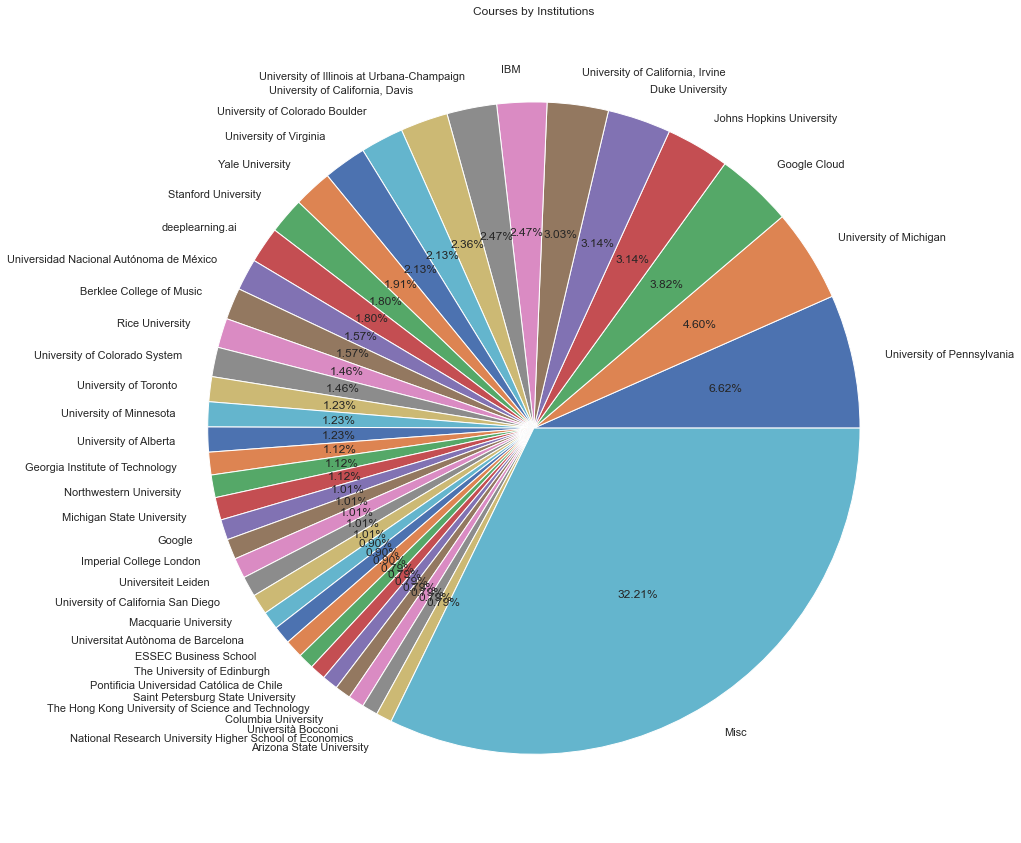

In [695]:
# Coursera Courses by different University and Organisation

df = pd.value_counts(mydf['course_organization'])/sum(pd.value_counts(mydf['course_organization']))*100
data2 = {'Organization': df.keys(),'Ratio': df[df.keys()]}


df2 = pd.DataFrame(data2)
df2 = df2[df2['Ratio']>0.7]
r = 100-df2['Ratio'].sum()
df2=df2.append(pd.DataFrame({"Organization":"Misc","Ratio":r},index=[0]))
labels = df2['Organization'].unique()

pie, ccoursera = plt.subplots(figsize=[15,15])
labels = df2['Organization'].unique()
plt.pie(x=df2['Ratio'], autopct="%.2f%%", labels=labels, pctdistance=.6)
plt.title("Courses by Institutions", fontsize=12);
plt.show()



In [696]:
# Number of University/ Organization in the Coursera Dataset
organization=mydf.course_organization.unique()
organization
len(organization)
for i,item in enumerate(organization):
    print(i+1,' ',item)

1   (ISC)²
2   University of Pennsylvania
3   Johns Hopkins University
4   Yale University
5   Indian School of Business
6   University at Buffalo
7   deeplearning.ai
8   IBM
9   Amazon Web Services
10   University of Toronto
11   University of California, Irvine
12   University of Illinois at Urbana-Champaign
13   University of Michigan
14   Universidad Nacional Autónoma de México
15   University of Colorado Boulder
16   National Research University Higher School of Economics
17   Google Cloud
18   Erasmus University Rotterdam
19   Duke University
20   University of Virginia
21   Atlassian
22   ScrumTrek
23   University of California San Diego
24   Stanford University
25   University of Colorado System
26   Copenhagen Business School
27   Macquarie University
28   Vanderbilt University
29   The University of Edinburgh
30   Technical University of Denmark (DTU)
31   Universidad Austral
32   Arizona State University
33   The Museum of Modern Art
34   National Arts Strategies
35   Univer

### Organization with the total nymber of course offered

In [697]:
#University/Organization with total number of courses
mydf['course_organization'].value_counts().head(10)

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_organization, dtype: int64

###  Distribution of total number of course offered by organization

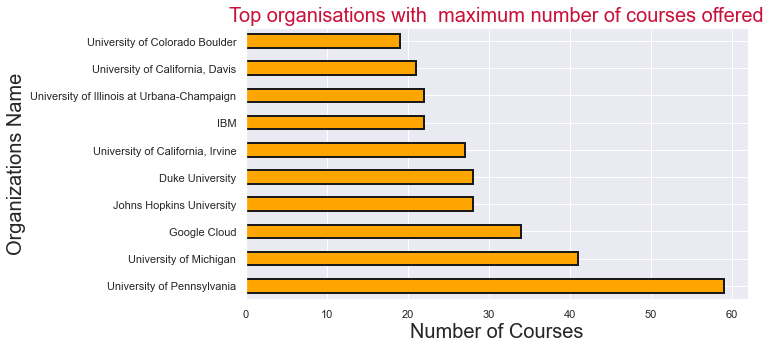

In [698]:
#Top organisations with maximum number of courses offered
x= mydf['course_organization'].value_counts(ascending=False)
a=x[:10]
a.plot(kind="barh", figsize=(9,5),color='orange',width=.5, lw=2, edgecolor='k')
plt.title('Top organisations with  maximum number of courses offered',color='#C9113C', fontsize =20)
plt.ylabel('Organizations Name', fontsize =20)
plt.xlabel('Number of Courses', fontsize =20)
plt.show()



>- From the above plot we can see that <b> University of Pennsylvania</b> is in the top position in terms of number of offering course follwed by the <b> University of Michigan </b> and <b> Google Cloud</b>.
>- Definatenately it is clear that those are the top institutions of offering varitys of courses. 
>- in my next analysis, I will try to see that which organizations is popular in term number of students enrolled.

In [699]:
# The column named 'course_students_enrolled' 
# having k with each value lets change this with 1000 so, that column look normal
mydf['course_students_enrolled']=mydf['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [700]:
# renaming the column 
mydf = mydf.rename(columns={"Unnamed: 0": "course_id"})

In [701]:
#Most Popular course Organisation
courseorg= pd.DataFrame(mydf.groupby('course_organization')['course_id'].count())
courseorg = courseorg.sort_values(by='course_id', ascending=False)[:20]
courseorg = courseorg.reset_index()
courseorg = courseorg.rename(columns={"course_id": "total_courses"})

In [702]:
#course organization and rating 
my_df = pd.DataFrame(mydf.groupby('course_organization')['course_rating'].mean()) 
my_df = my_df.reset_index()
my_df.head(10)

course_organization  course_rating
0                                        (ISC)²       4.733333
1                           Amazon Web Services       4.550000
2  American Institute of Business and Economics       4.400000
3            American Museum of Natural History       4.750000
4                      Arizona State University       4.771429
5                                     Atlassian       4.750000
6                                      Autodesk       4.750000
7                           Automation Anywhere       4.600000
8                                           BCG       4.800000
9                      Berklee College of Music       4.807143

In [703]:
#merging 
courseorg = courseorg.merge(my_df, on='course_organization', how='inner')

In [704]:

my2_df = pd.DataFrame(mydf.groupby('course_organization')['course_students_enrolled'].sum())
my2_df = my2_df.reset_index()
my2_df

course_organization  course_students_enrolled
0                                          (ISC)²                      9900
1                             Amazon Web Services                    364000
2    American Institute of Business and Economics                     11000
3              American Museum of Natural History                     30000
4                        Arizona State University                    589500
..                                            ...                       ...
149                             Yonsei University                    563000
150                               deeplearning.ai                   2863400
151                           École Polytechnique                    190000
152      École Polytechnique Fédérale de Lausanne                    471000
153                     École des Ponts ParisTech                     14000

[154 rows x 2 columns]

In [705]:
courseorg = courseorg.merge(my2_df, on='course_organization', how='inner')


### Organization with more than 10 courses offered

In [706]:
def find_organization(data):
    dict = {}
    # course organization is put to list
    course_organization = data['course_organization'].to_list()
    # for loop used to iterate through all the organization and if it is found in the dict then increment
    for organization in   course_organization:
        if organization in dict:
            dict[organization] += 1
        else:
            dict[organization] = 1
    # creating empty list for the organization and also for count
    org = []
    counter = []

    for key, value in dict.items():
        if value > 10:
            org.append(key)
            counter.append(value)
        else:
            continue
    organization_offered_more_than_course = pd.DataFrame({'course_organization':org, 'count':counter})
    organization_offered_more_than_course.sort_values(by='count', ascending=False, inplace=True)
    return organization_offered_more_than_course

In [707]:
organization_offered_more_than_course = find_organization(mydf)
organization_offered_more_than_course.head(10)

course_organization  count
0                   University of Pennsylvania     59
8                       University of Michigan     41
11                                Google Cloud     34
1                     Johns Hopkins University     28
12                             Duke University     28
6             University of California, Irvine     27
4                                          IBM     22
7   University of Illinois at Urbana-Champaign     22
16             University of California, Davis     21
13                      University of Virginia     19

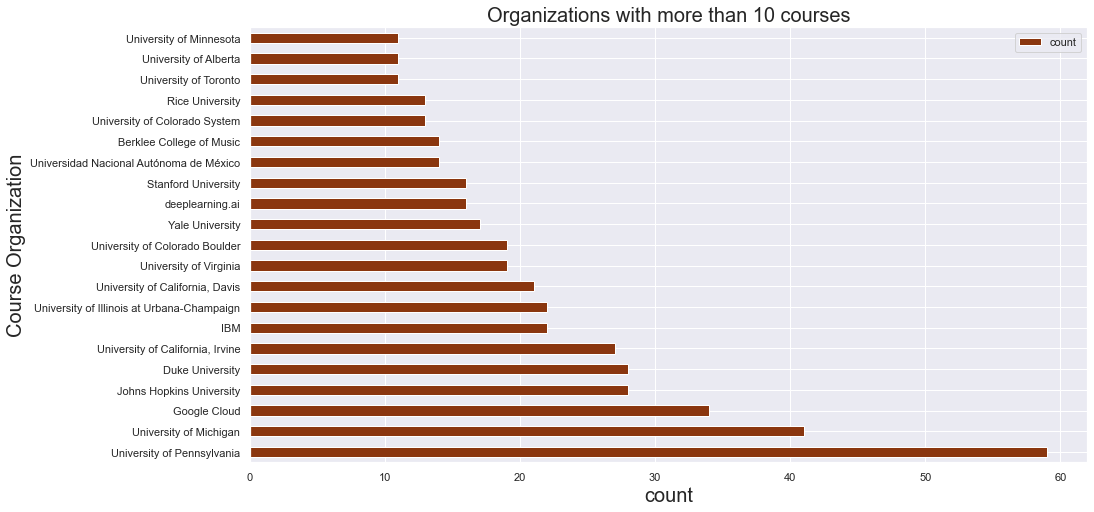

In [708]:
organization_offered_more_than_course.plot(kind='barh',figsize=(15,8),color='#8A360F', x='course_organization', y='count' )
plt.title('Organizations with more than 10 courses', fontsize =20)
plt.xlabel('count', fontsize =20)
plt.ylabel('Course Organization', fontsize =20)
plt.show()

In [709]:
# The column named 'course_students_enrolled' 
# Having k with each value lets change this with 1000 so, that column look normal
mydf['course_students_enrolled']=mydf['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

### Top 10 Organizations/University  enrolled students wise in coursera

In [710]:
#Top 10 Organizations/University  enrolled students wise in coursera

enroll = mydf.loc[:, ['course_organization','course_students_enrolled']]
enroll = pd.DataFrame(enroll.groupby(['course_organization'])['course_students_enrolled'].sum())
enroll = enroll.sort_values(by=['course_students_enrolled'], ascending=False)
enroll = enroll.head(10)
print('Organization Enrolled Students')
print(enroll)

Organization Enrolled Students
                                  course_students_enrolled
course_organization                                       
University of Michigan                             7437700
University of Pennsylvania                         5501300
Stanford University                                4854000
University of California, Irvine                   4326000
Johns Hopkins University                           4298900
Duke University                                    3967600
Yale University                                    3952000
IBM                                                2956400
deeplearning.ai                                    2863400
Google Cloud                                       2604300


In [711]:
df_new = mydf.groupby(['course_organization'],as_index=False)[['course_rating' ,'course_students_enrolled']].sum()

In [712]:
df_new = df_new.sort_values(by=['course_students_enrolled'], ascending=False)
df_new=df_new.nlargest(10,'course_students_enrolled')
#df_new1=df_new.head(10)
df_new

course_organization  course_rating  course_students_enrolled
135            University of Michigan          193.9                   7437700
138        University of Pennsylvania          277.1                   5501300
85                Stanford University           76.3                   4854000
123  University of California, Irvine          124.1                   4326000
48           Johns Hopkins University          130.5                   4298900
20                    Duke University          130.6                   3967600
148                   Yale University           81.9                   3952000
38                                IBM          101.5                   2956400
150                   deeplearning.ai           75.9                   2863400
34                       Google Cloud          155.8                   2604300

<function matplotlib.pyplot.show(close=None, block=None)>

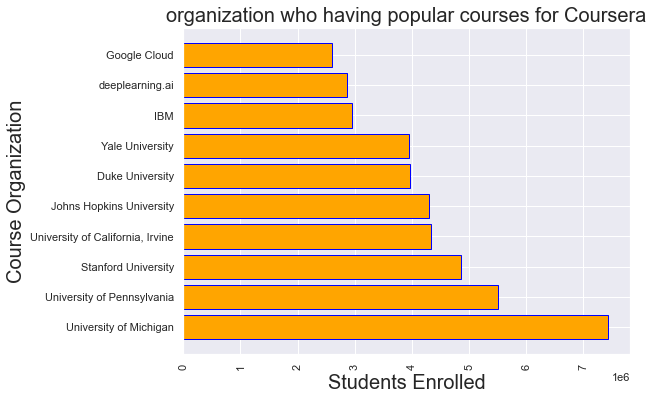

In [713]:
fig = plt.figure(figsize =(8,6))
plt.xticks(rotation='vertical')
plt.barh(df_new['course_organization'],df_new['course_students_enrolled'],color='orange', edgecolor='blue')
plt.title('organization who having popular courses for Coursera', fontsize =20)
plt.ylabel('Course Organization', fontsize =20)
plt.xlabel('Students Enrolled', fontsize =20)
plt.show

In [714]:
fig = px.bar(courseorg.sort_values(by='course_students_enrolled', ascending=False), x='course_students_enrolled', y='course_organization',orientation='h',height=550)
fig.update_layout(title_text='Most popular Course Organization',
                 xaxis_title="Number of Students",yaxis_title="Course organization")
fig.show()

>- According to the results of the above analysis, students choose to enroll themselves at the University of Michigan, followed by Pennsylyvania, Stanford University, and the University of California.
>- We can see that universities are still popular, as evidenced by the fact that the top seven positions are still held by universities rather than other IT-based companies like IBM and Google.
>- I will consider this difference who is performing better in term of popularity( Universities vs Other online courses)
>- In the following section, I will compare the top four organizations in terms of student enrollment and rating.

# University wise analysis
course_organization with more than 10 courses - students enrolled (k)

In [715]:
g_uni=mydf.groupby("course_organization")["course_students_enrolled",'course_rating'].agg({"course_students_enrolled":'size',"course_students_enrolled":'mean','course_rating':'mean'}).reset_index()
g_uni

course_organization  course_students_enrolled  \
0                                          (ISC)²               3300.000000   
1                             Amazon Web Services              60666.666667   
2    American Institute of Business and Economics              11000.000000   
3              American Museum of Natural History              15000.000000   
4                        Arizona State University              84214.285714   
..                                            ...                       ...   
149                             Yonsei University             140750.000000   
150                               deeplearning.ai             178962.500000   
151                           École Polytechnique             190000.000000   
152      École Polytechnique Fédérale de Lausanne             117750.000000   
153                     École des Ponts ParisTech              14000.000000   

     course_rating  
0         4.733333  
1         4.550000  
2         4.400000  
3         4.750000  
4         4.771429  
..             ...  
149       4.750000  
150       4.743750  
151       4.800000  
152       4.725000  
153       4.700000  

[154 rows x 3 columns]

In [214]:
g_uni_2=mydf.groupby("course_organization")["course_students_enrolled"].agg({'size'}).reset_index()
g_uni['size']=g_uni_2['size']
g_uni_final=g_uni[g_uni_2['size']> 10]
g_uni_final.sort_values(by=["course_students_enrolled","course_rating"],ascending=False)

course_organization  course_students_enrolled  \
85                          Stanford University             303375.000000   
148                             Yale University             232470.588235   
135                      University of Michigan             181407.317073   
150                             deeplearning.ai             178962.500000   
123            University of California, Irvine             160222.222222   
48                     Johns Hopkins University             153532.142857   
20                              Duke University             141700.000000   
38                                          IBM             134381.818182   
138                  University of Pennsylvania              93242.372881   
9                      Berklee College of Music              92000.000000   
109     Universidad Nacional Autónoma de México              86278.571429   
141                      University of Virginia              81894.736842   
34                                 Google Cloud              76597.058824   
131  University of Illinois at Urbana-Champaign              76318.181818   
140                       University of Toronto              67781.818182   
122             University of California, Davis              60890.476190   
76                              Rice University              56615.384615   
136                     University of Minnesota              48000.000000   
119                       University of Alberta              41800.000000   
126              University of Colorado Boulder              32363.157895   
127               University of Colorado System              21892.307692   

     course_rating  size  
85        4.768750    16  
148       4.817647    17  
135       4.729268    41  
150       4.743750    16  
123       4.596296    27  
48        4.660714    28  
20        4.664286    28  
38        4.613636    22  
138       4.696610    59  
9         4.807143    14  
109       4.750000    14  
141       4.715789    19  
34        4.582353    34  
131       4.654545    22  
140       4.627273    11  
122       4.619048    21  
76        4.676923    13  
136       4.609091    11  
119       4.727273    11  
126       4.668421    19  
127       4.715385    13

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

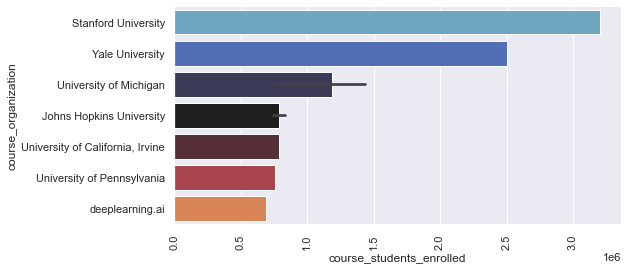

In [540]:
#Top 10 organizations based on popularity or student enrollment
find_pop_org=mydf[['course_organization','course_students_enrolled']]
Ten_pop_org = find_pop_org.nlargest(10,['course_students_enrolled'])
sns.barplot(y = Ten_pop_org['course_organization'], x = Ten_pop_org['course_students_enrolled'],orient='h',palette='icefire')
plt.xticks(rotation = 90)

### The Course Students Enrolled trend observation for selected four Universities:

Text(32.01281055491255, 0.5, 'Course-Rating')

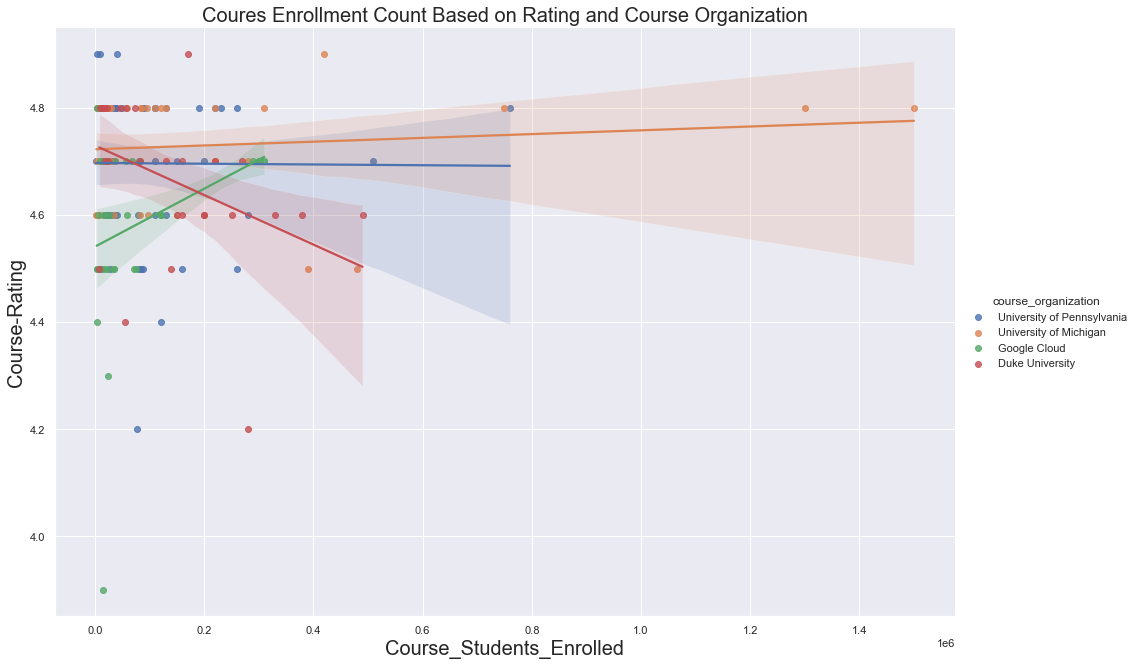

In [541]:
sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_organization", 
           data=mydf.loc[mydf["course_organization"].isin(['University of Pennsylvania','University of Michigan','Google Cloud','Duke University'   ])], 
           fit_reg=True, height=9, aspect=1.5)
plt.title("Coures Enrollment Count Based on Rating and Course Organization", fontsize =20)
plt.xlabel("Course_Students_Enrolled", fontsize =20)
plt.ylabel("Course-Rating", fontsize=20)

>- As previous finding, here also it is found that University of Michigan is in the top position in term of popularities followed by the Unversity of Pennysylivania.
>- it is worth checking that what are the popular course title of this two organization.We can compare popular course title between this two organization.
>- I will check this trend in the reviews files from coursera as well just to see that which one is the top from customer reviews. In that case I need to merge the review file with the coursera data to find this.

In [542]:
# University of Michigan for ---many courses from this university etc.
University_of_Michigan =mydf[mydf['course_organization']=='University of Michigan']

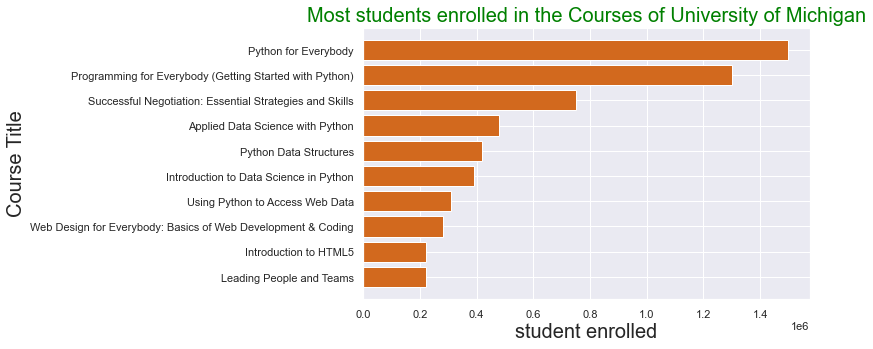

In [501]:
# The courses which have greater enrollment of students in University of Michigan.
cenrolled=University_of_Michigan[['course_title','course_students_enrolled']]
# The top courses or specialization which have greater students enrolled
tenrolled=cenrolled.nlargest(10,['course_students_enrolled'])

# bar plot for these courses
x=tenrolled['course_title']
y=tenrolled['course_students_enrolled']
plt.figure(figsize=(8,5))
#bar_color=['#D2691E','FireBrick','#4682B4','#778899','#66CDAA','yellow','red','green','MediumPurple','Plum']
plt.barh(x,y,color='#D2691E')
plt.gca().invert_yaxis()
plt.xlabel('student enrolled', fontsize =20)
plt.ylabel("Course Title", fontsize=20)
plt.title('Most students enrolled in the Courses of University of Michigan',color='green',fontsize=20)
plt.show()

In [543]:
# Course certificate type of University of Michigan
cc=University_of_Michigan['course_Certificate_type'].value_counts()
# the course difficulty of courses of university of michigan
cd=University_of_Michigan['course_difficulty'].value_counts()
# lets check total strenght of students enrolled in all courses of university of michigan
ce=University_of_Michigan['course_students_enrolled'].sum()
print(cc)
print(cd)
print(ce)

COURSE            30
SPECIALIZATION    11
Name: course_Certificate_type, dtype: int64
Beginner        19
Mixed           12
Intermediate    10
Name: course_difficulty, dtype: int64
7437700


In [544]:
#top 20 courses and specializations as per number of enrolled students 

dfc = mydf[mydf['course_Certificate_type'] == 'COURSE']
dfs = mydf[mydf['course_Certificate_type'] == 'SPECIALIZATION']

as1=dfc.sort_values('course_students_enrolled' , ascending=False)
as2 = dfs.sort_values('course_students_enrolled' , ascending=False)

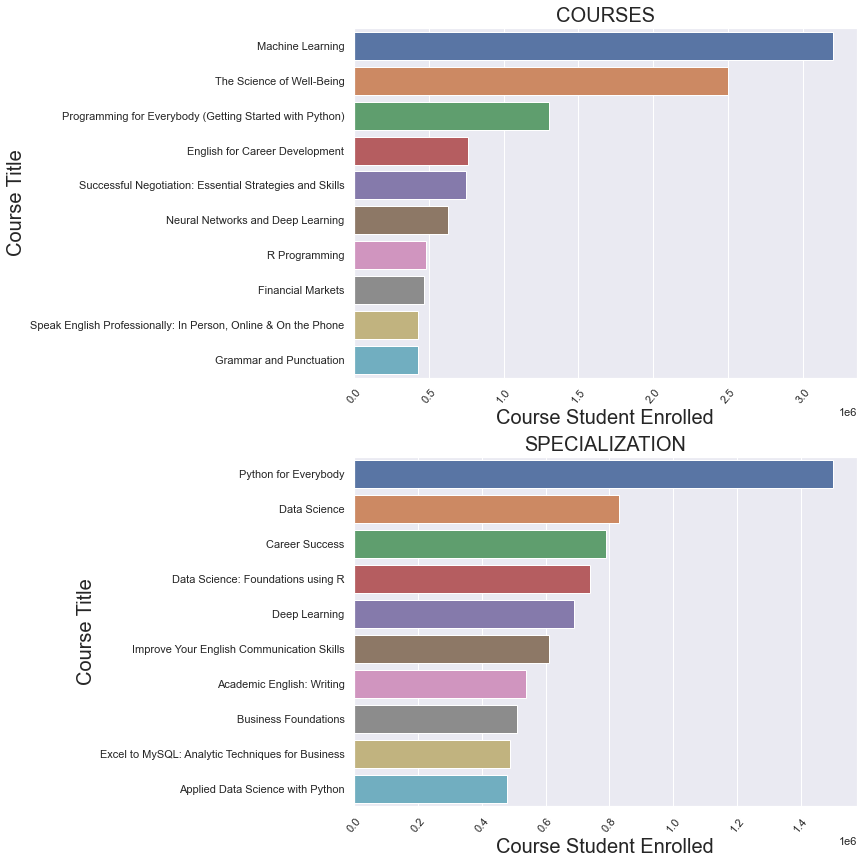

In [296]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
sns.barplot(x= 'course_students_enrolled' , y = 'course_title' , data = as1[:10] )
plt.xticks(rotation=50)
plt.title('COURSES', fontsize =20)
plt.xlabel("Course Student Enrolled", fontsize =20)
plt.ylabel("Course Title", fontsize =20)
plt.tight_layout(pad = 0.6)

plt.subplot(2,1,2)
sns.barplot(x= 'course_students_enrolled' , y = 'course_title' , data = as2[:10] )
plt.ylabel('specialization_title')
plt.xticks(rotation=50)
plt.title('SPECIALIZATION', fontsize =20)
plt.xlabel("Course Student Enrolled", fontsize =20)
plt.ylabel("Course Title", fontsize =20)
plt.tight_layout(pad = 0.6)


In [545]:
col_name = ["id", "title", "organizer", "type", "rating", "difficulty", "students"]
mysort = pd.read_csv("data/coursea_data.csv",header=0, names=col_name, index_col="id").sort_values("id")


In [300]:
#Courses by-University of Michigan
particular_institution = "University of Michigan"
mask = mysort["organizer"] == particular_institution
mysort[mask].sort_values(by='rating', ascending=False)

title  \
id                                                       
111                             Python Data Structures   
3                                 Python for Everybody   
199                    Using Python to Access Web Data   
555          Python Functions, Files, and Dictionaries   
664                               Introduction to CSS3   
443               Inspiring and Motivating Individuals   
696  The Science of Success: What Researchers Know ...   
727                     Accounting for Decision Making   
350                        Using Databases with Python   
341  Negociación exitosa: Estrategias y habilidades...   
337  Foundational Finance for Strategic Decision Ma...   
735  Introduction to Thermodynamics: Transferring E...   
279                                      Python Basics   
744  Introduction to User Experience Principles and...   
505                                     Model Thinking   
182                     Web Applications for Everybody   
119                                            Anatomy   
117                User Experience Research and Design   
47   Programming for Everybody (Getting Started wit...   
814         Sleep: Neurobiology, Medicine, and Society   
40   Successful Negotiation: Essential Strategies a...   
508  Anatomy: Musculoskeletal and Integumentary Sys...   
755  Leading for Equity, Diversity and Inclusion in...   
783         Data Collection and Processing with Python   
806                                      Dentistry 101   
356         Financial Technology (Fintech) Innovations   
465     Understanding and Visualizing Data with Python   
307                              Introduction to HTML5   
109  Finding Purpose and Meaning In Life: Living fo...   
61                            Leading People and Teams   
42   Web Design for Everybody: Basics of Web Develo...   
869                     Python Classes and Inheritance   
491  Applied Plotting, Charting & Data Representati...   
536  Capstone: Retrieving, Processing, and Visualiz...   
630                 Applied Machine Learning in Python   
456  Beyond the Sustainable Development Goals (SDGs...   
355               Good with Words: Writing and Editing   
127                             Statistics with Python   
837  Instructional Methods in Health Professions Ed...   
26                    Applied Data Science with Python   
187             Introduction to Data Science in Python   

                  organizer            type  rating    difficulty students  
id                                                                          
111  University of Michigan          COURSE     4.9         Mixed     420k  
3    University of Michigan  SPECIALIZATION     4.8      Beginner     1.5m  
199  University of Michigan          COURSE     4.8         Mixed     310k  
555  University of Michigan          COURSE     4.8      Beginner      26k  
664  University of Michigan          COURSE     4.8         Mixed      84k  
443  University of Michigan          COURSE     4.8         Mixed      85k  
696  University of Michigan          COURSE     4.8      Beginner      59k  
727  University of Michigan          COURSE     4.8  Intermediate     9.9k  
350  University of Michigan          COURSE     4.8         Mixed     220k  
341  University of Michigan          COURSE     4.8         Mixed      95k  
337  University of Michigan  SPECIALIZATION     4.8      Beginner      14k  
735  University of Michigan          COURSE     4.8      Beginner     4.1k  
279  University of Michigan          COURSE     4.8      Beginner     110k  
744  University of Michigan          COURSE     4.8      Beginner      16k  
505  University of Michigan          COURSE     4.8         Mixed     130k  
182  University of Michigan  SPECIALIZATION     4.8  Intermediate     120k  
119  University of Michigan  SPECIALIZATION     4.8      Beginner      30k  
117  University of Michigan  SPECIALIZATION     4.8      Beginner      23k  
47   Universit

In [546]:
# University of Pennsylvania for ---many courses from this university etc.
University_of_Pennsylvania =mydf[mydf['course_organization']=='University of Pennsylvania']

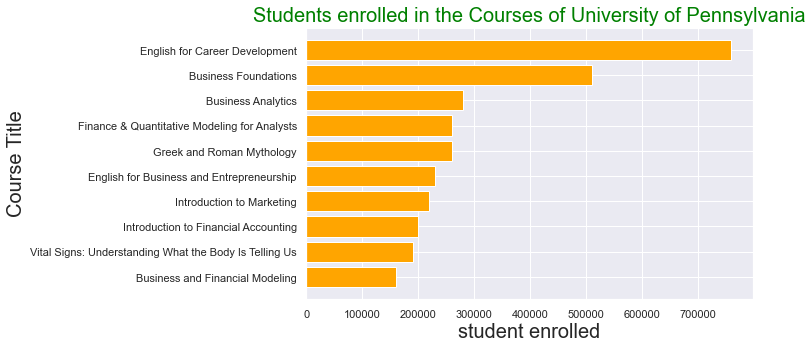

In [547]:
# The courses which have greater enrollment of students in University of Pennsylvania
cenrolled=University_of_Pennsylvania[['course_title','course_students_enrolled']]
# The top courses or specialization which have greater students enrolled
tenrolled=cenrolled.nlargest(10,['course_students_enrolled'])

# bar plot for these courses
x=tenrolled['course_title']
y=tenrolled['course_students_enrolled']
plt.figure(figsize=(8,5))
#bar_color=['#D2691E','FireBrick','#4682B4','#778899','#66CDAA','yellow','red','green','MediumPurple','Plum']
plt.barh(x,y,color='orange')
plt.gca().invert_yaxis()
plt.xlabel('student enrolled', fontsize =20)
plt.ylabel("Course Title", fontsize =20)
plt.title('Students enrolled in the Courses of University of Pennsylvania',color='green',fontsize=20)
plt.show()

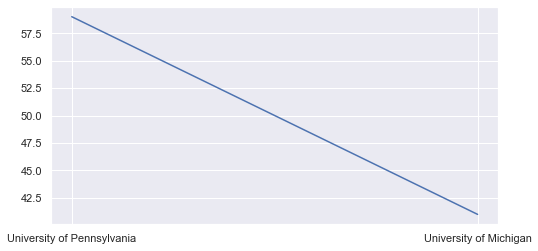

In [548]:
#TOP-2 of organizations by numbers of published courses comparision
organizations= mydf["course_organization"].value_counts().sort_values(ascending=False)[0:2]
plt.plot(organizations.index, organizations)

In [549]:
#Most popular course organization
# #Organasation
# mydf['course_organization'].value_counts().head(10)

In [550]:
#Organisation has highest course rating
hcr = round(mydf.groupby(['course_organization'])['course_rating'].mean()).to_dict()
print(hcr)

{'(ISC)²': 5.0, 'Amazon Web Services': 5.0, 'American Institute of Business and Economics': 4.0, 'American Museum of Natural History': 5.0, 'Arizona State University': 5.0, 'Atlassian': 5.0, 'Autodesk': 5.0, 'Automation Anywhere': 5.0, 'BCG': 5.0, 'Berklee College of Music': 5.0, 'Birkbeck, University of London': 5.0, 'Bloomsbury Learning Exchange': 5.0, 'California Institute of the Arts': 5.0, 'Case Western Reserve University': 5.0, 'Cisco': 5.0, 'Cloudera': 5.0, 'Columbia University': 5.0, 'ConsenSys Academy': 5.0, 'Copenhagen Business School': 5.0, 'Crece con Google': 5.0, 'Duke University': 5.0, 'E-Learning Development Fund': 5.0, 'EDHEC Business School': 5.0, 'ESADE Business and Law School': 5.0, 'ESCP Business School': 5.0, 'ESSEC Business School': 5.0, 'Eindhoven University of Technology': 5.0, 'Emory University': 4.0, 'Erasmus University Rotterdam': 5.0, 'Fundação Instituto de Administração': 4.0, 'Georgia Institute of Technology': 5.0, 'Goldsmiths, University of London': 4.0, 

In [333]:
#Organisation has highest course rating>=4.9
hcr = pd.DataFrame({'course_organization': list(hcr.keys()), 'course_rating': list(hcr.values())})
hrating = hcr[hcr['course_rating'] >=4.9]
#print(hrating)
hrating.head(20)


course_organization  course_rating
0                               (ISC)²            5.0
1                  Amazon Web Services            5.0
3   American Museum of Natural History            5.0
4             Arizona State University            5.0
5                            Atlassian            5.0
6                             Autodesk            5.0
7                  Automation Anywhere            5.0
8                                  BCG            5.0
9             Berklee College of Music            5.0
10      Birkbeck, University of London            5.0
11        Bloomsbury Learning Exchange            5.0
12    California Institute of the Arts            5.0
13     Case Western Reserve University            5.0
14                               Cisco            5.0
15                            Cloudera            5.0
16                 Columbia University            5.0
17                   ConsenSys Academy            5.0
18          Copenhagen Business School            5.0
19                    Crece con Google            5.0
20                     Duke University            5.0

>- It is clear from the above obseravation that Those are the organization top rating organization even though number of enrolled students there are lower then the other Universities organizations such Universities of Michgan.
>- It suggests that in some cases in some extent Top rating like 5 does not affect on enrolling students although ovearll rating of popular organization are high in the range of 4.6 to 4.9
>- It can be one of the reason that still most of the students are considering that Universities certfate are considered as well recognized certificate.
>- Next part I will check what are the words attract studnets to enroll

In [551]:
#Organisation has highest course rating
h = round(mydf.groupby(['course_organization'])['course_students_enrolled'].mean()).to_dict()
print(h)

{'(ISC)²': 3300.0, 'Amazon Web Services': 60667.0, 'American Institute of Business and Economics': 11000.0, 'American Museum of Natural History': 15000.0, 'Arizona State University': 84214.0, 'Atlassian': 40000.0, 'Autodesk': 12050.0, 'Automation Anywhere': 2200.0, 'BCG': 20000.0, 'Berklee College of Music': 92000.0, 'Birkbeck, University of London': 47000.0, 'Bloomsbury Learning Exchange': 14000.0, 'California Institute of the Arts': 95000.0, 'Case Western Reserve University': 61833.0, 'Cisco': 46500.0, 'Cloudera': 14000.0, 'Columbia University': 46457.0, 'ConsenSys Academy': 31000.0, 'Copenhagen Business School': 48400.0, 'Crece con Google': 8800.0, 'Duke University': 141700.0, 'E-Learning Development Fund': 55000.0, 'EDHEC Business School': 9533.0, 'ESADE Business and Law School': 34000.0, 'ESCP Business School': 6500.0, 'ESSEC Business School': 21562.0, 'Eindhoven University of Technology': 39000.0, 'Emory University': 47600.0, 'Erasmus University Rotterdam': 37360.0, 'Fundação Ins

check here plese

In [552]:
#Organisation has highest course rating>=4.9
hcr = pd.DataFrame({'course_organization': list(hcr.keys()), 'course_rating': list(hcr.values())})
hrating = hcr[hcr['course_rating'] >=4.9]
#print(hrating)
hrating.head(20)

course_organization  course_rating
0                               (ISC)²            5.0
1                  Amazon Web Services            5.0
3   American Museum of Natural History            5.0
4             Arizona State University            5.0
5                            Atlassian            5.0
6                             Autodesk            5.0
7                  Automation Anywhere            5.0
8                                  BCG            5.0
9             Berklee College of Music            5.0
10      Birkbeck, University of London            5.0
11        Bloomsbury Learning Exchange            5.0
12    California Institute of the Arts            5.0
13     Case Western Reserve University            5.0
14                               Cisco            5.0
15                            Cloudera            5.0
16                 Columbia University            5.0
17                   ConsenSys Academy            5.0
18          Copenhagen Business School            5.0
19                    Crece con Google            5.0
20                     Duke University            5.0

#### What words attract students to enroll
>- From this world- it will extract all the popular word found from the world cloud
>- It can be said that those words are popular

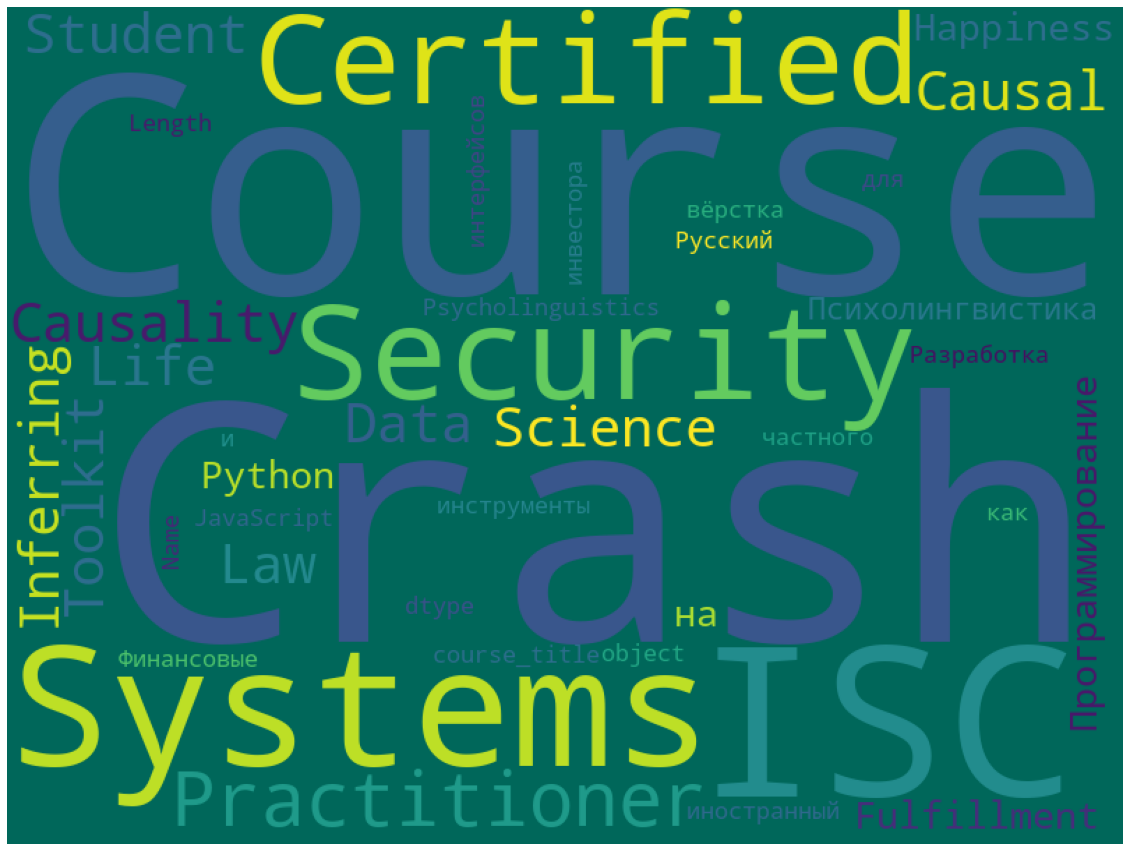

In [553]:
#A Word Cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to
#highlight popular words
#and phrases based on frequency and relevance.

#Word Cloud :To see what words attract a student to enroll the course
attract = WordCloud(width = 800, height = 600, 
            background_color ='#00675A', 
                    #Stop words are words that are filtered out before or after
                    #the natural language data (text) are processed
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(mydf['course_title']))

plt.figure(figsize = (20, 16))
plt.imshow(attract)
plt.axis("off")
plt.show()


>- It is observed from the above word visualisation same kind of word what I find from my previous finding. 
>- In my next part I will check most popular courses in coursera

>- It is observed from this visualisation that most of course in coursera rating range 4.5 to 4.9. So it can be said that they are maintaing the quality of the courses. 
>- That is why, Most of the course lies in thoses rating range.

# Most popular course Analysis:

### RQ2: What course are performing best for customer?
>- What course are popular in term of enrollment?
>- What courses have the top rating? 
>- Here I also have shown that some of the courses are top in term of their rating, but in term of students enrolment they are way behind some of the overall rating courses such as machine learning and python.

### Top enrolled courses: 

In [554]:
#Top courses of enrolment
top_10_courses = mydf.loc[:,['course_title', 'course_students_enrolled']]
top_10_courses = top_10_courses.sort_values(by=['course_students_enrolled'], ascending=False)
top_10_courses = top_10_courses.head(10)
top_10_courses

course_title  \
564                                   Machine Learning   
815                          The Science of Well-Being   
688                               Python for Everybody   
674  Programming for Everybody (Getting Started wit...   
196                                       Data Science   
129                                     Career Success   
261                     English for Career Development   
765  Successful Negotiation: Essential Strategies a...   
199                  Data Science: Foundations using R   
211                                      Deep Learning   

     course_students_enrolled  
564                   3200000  
815                   2500000  
688                   1500000  
674                   1300000  
196                    830000  
129                    790000  
261                    760000  
765                    750000  
199                    740000  
211                    690000

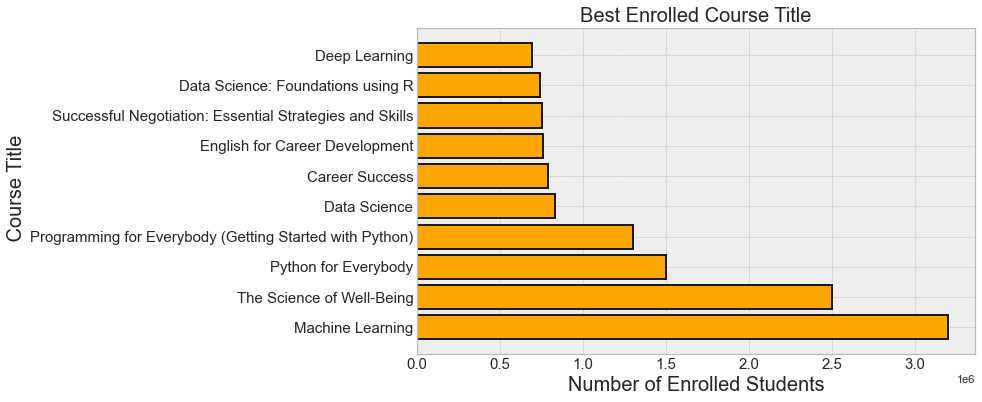

In [559]:
matplotlib.style.use('bmh')
plt.figure(figsize=(10,6))
plt.barh(top_10_courses['course_title'], top_10_courses['course_students_enrolled'], color="orange",lw=2, edgecolor='k')
plt.title("Best Enrolled Course Title", fontsize=20)
plt.ylabel(" Course Title", fontsize=20)
plt.xlabel("Number of Enrolled Students", fontsize=20)
#plt.yticks(range(10000,500000,10000 ))
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.show()


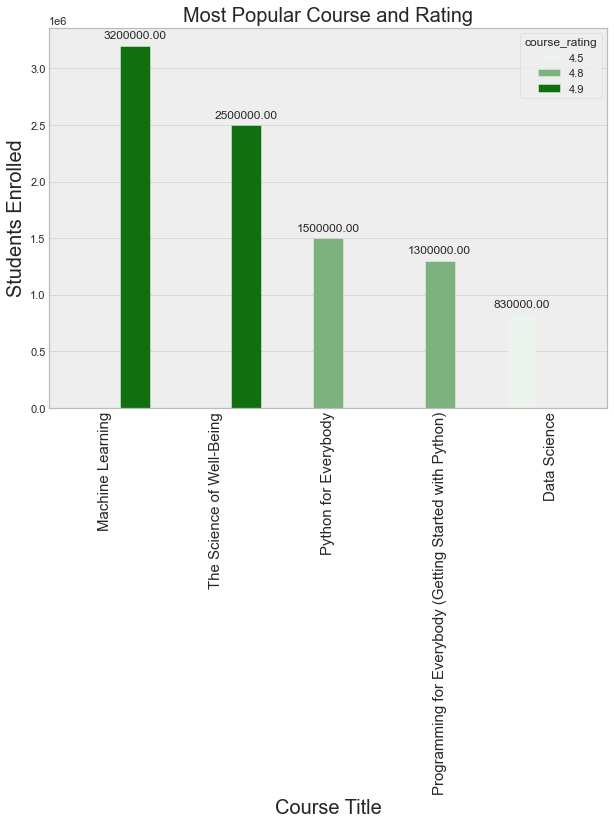

In [570]:
#COURSES WITH MOST STUDENTS ENROLLMENT AND THEIR RATINGS
large=mydf.nlargest(5, ['course_students_enrolled'])
plt.figure(figsize=(10,7))
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating", data=large, color= "green")
plt.xticks(size=15,rotation='vertical')
plt.xlabel('Course Title', fontsize =20)
plt.ylabel('Students Enrolled', fontsize =20)
plt.title("Most Popular Course and Rating", fontsize =20)

for p in g.patches:
    g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
#fig.tight_layout()
plt.show()

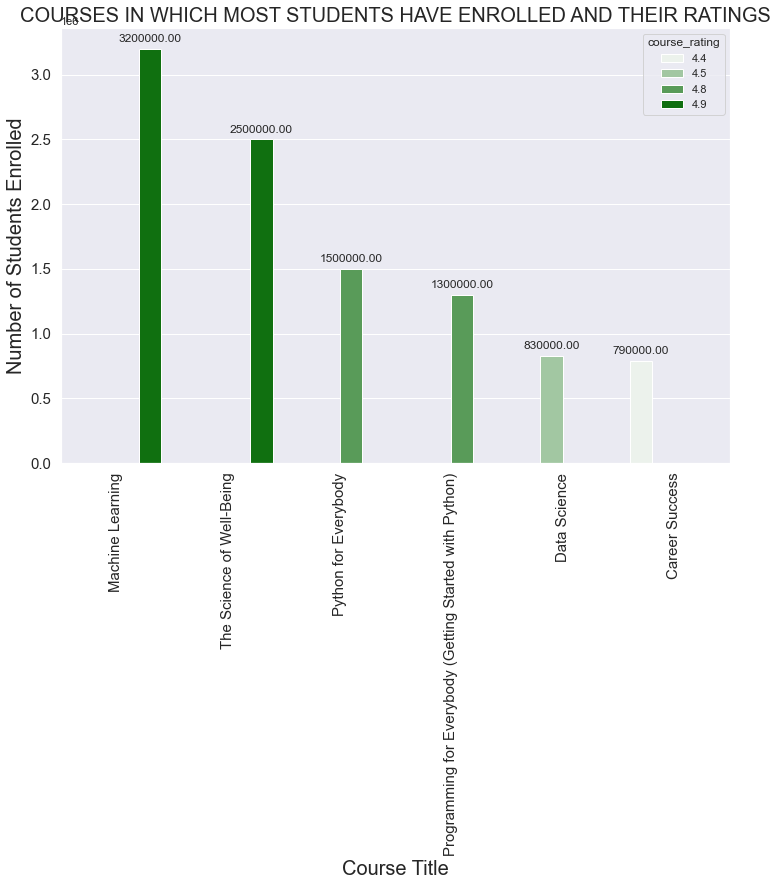

In [341]:
# #COURSES WITH MOST STUDENTS ENROLLMENT AND THEIR RATINGS
# large=mydf.nlargest(5, ['course_students_enrolled'])
# plt.figure(figsize=(15,10))
# g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating", data=large, color= "orange")
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.xlabel('Course Title', fontsize =20)
# plt.ylabel('Number of Students Enrolled', fontsize =20)
# plt.title("Poplular courses and their rating", fontsize =20)

# for p in g.patches:
#     g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# plt.xticks(rotation=45)
# #fig.tight_layout()
# plt.show()

#COURSES WITH MOST STUDENTS ENROLLMENT AND THEIR RATINGS
large=mydf.nlargest(6, ['course_students_enrolled'])
plt.figure(figsize=(12,8))
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating", data=large, color= "green")
#plt.xticks('vertical')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Course Title', fontsize =20)
plt.ylabel('Number of Students Enrolled', fontsize =20)
plt.title("COURSES IN WHICH MOST STUDENTS HAVE ENROLLED AND THEIR RATINGS", fontsize =20)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation="vertical",ha='center')
#fig.tight_layout()
plt.show()

>- We can see from the above visualisation that Machine Learning, The Science of Well-being, Python for Everybody are the top 3 course title in Coursera in terms of their overall rating and number of enrollment of students.

Text(0, 0.5, 'Course Title')

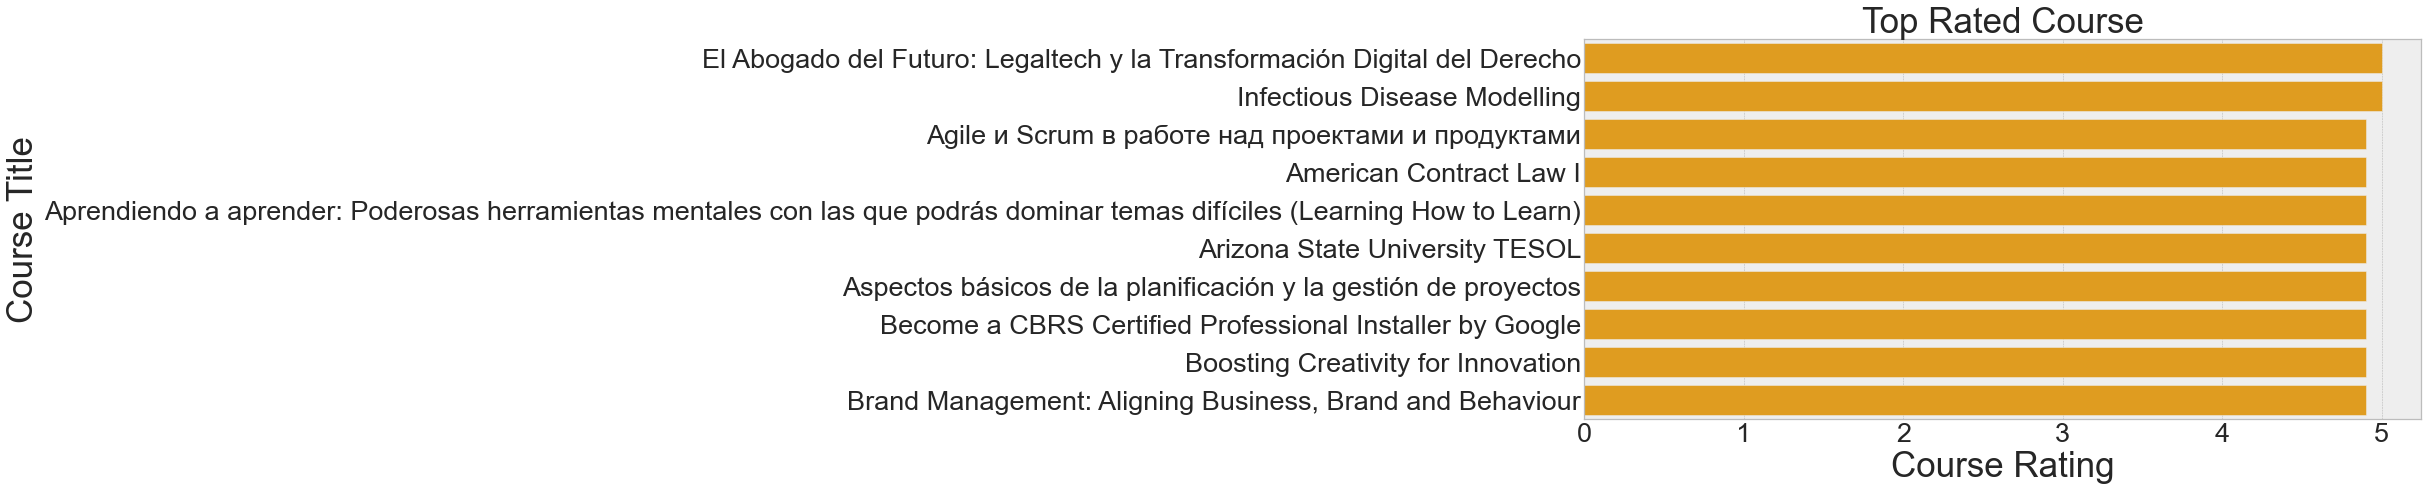

In [583]:
#Top 10 courses based on rating
find_course=mydf[['course_title','course_rating']]
Ten_course = find_course.nlargest(10,['course_rating'])
plt.figure(figsize=(15,7))
sns.barplot(y = Ten_course['course_title'], x = Ten_course['course_rating'],orient='h',color="orange")
plt.yticks(size=27)
plt.xticks(size=27)
plt.title("Top Rated Course", fontsize=35)
plt.xlabel("Course Rating", fontsize =35)
plt.ylabel("Course Title", fontsize=35)

Text(0, 0.5, 'Course Title')

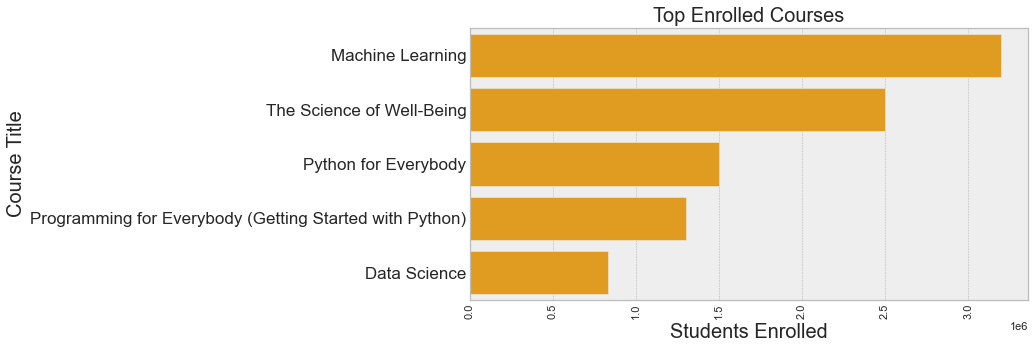

In [584]:
#Top 10 courses based on popularity or student enrollment
find_pop_course=mydf[['course_title','course_students_enrolled']]
Ten_pop_course = find_pop_course.nlargest(5,['course_students_enrolled'])
plt.figure(figsize=(10,5))
sns.barplot(x = Ten_pop_course['course_students_enrolled'], y = Ten_pop_course['course_title'],orient='h',color="orange")
plt.xticks(rotation = 90)
plt.yticks(size=17)
plt.title("Top Enrolled Courses", fontsize=20)
plt.xlabel("Students Enrolled", fontsize =20)
plt.ylabel("Course Title", fontsize=20)

In [585]:
# All start with the form 'D'(Uppercase). Sort courses containing 'Data' by 'enrolled'
dfd=mydf[mydf['course_title'].str.contains('Data')].sort_values(by=['course_students_enrolled'], ascending=False)
dfd.head(10)

course_id                            course_title  \
196         13                            Data Science   
199         15       Data Science: Foundations using R   
56          26        Applied Data Science with Python   
420          0                        IBM Data Science   
800        243            The Data Scientist’s Toolbox   
684        111                  Python Data Structures   
487        187  Introduction to Data Science in Python   
27         157          Advanced Data Science with IBM   
850        199         Using Python to Access Web Data   
486          1            Introduction to Data Science   

          course_organization   course_Certificate_type  course_rating  \
196  Johns Hopkins University            SPECIALIZATION            4.5   
199  Johns Hopkins University            SPECIALIZATION            4.6   
56     University of Michigan            SPECIALIZATION            4.5   
420                       IBM  PROFESSIONAL CERTIFICATE            4.6   
800  Johns Hopkins University                    COURSE            4.6   
684    University of Michigan                    COURSE            4.9   
487    University of Michigan                    COURSE            4.5   
27                        IBM            SPECIALIZATION            4.4   
850    University of Michigan                    COURSE            4.8   
486                       IBM            SPECIALIZATION            4.6   

    course_difficulty  course_students_enrolled  
196          Beginner                    830000  
199          Beginner                    740000  
56       Intermediate                    480000  
420          Beginner                    480000  
800             Mixed                    420000  
684             Mixed                    420000  
487      Intermediate                    390000  
27           Advanced                    320000  
850             Mixed                    310000  
486          Beginner                    310000

<function matplotlib.pyplot.show(close=None, block=None)>

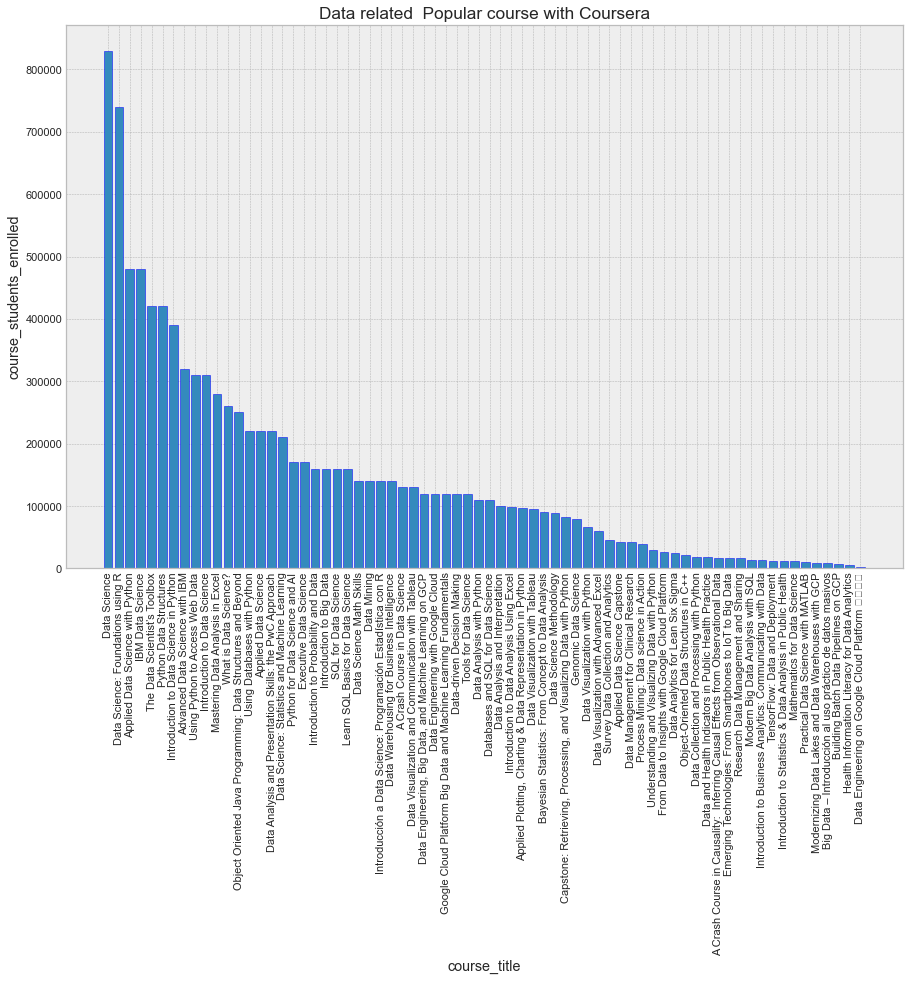

In [586]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfd['course_title'],dfd['course_students_enrolled'], edgecolor='blue')
plt.title('Data related  Popular course with Coursera')
plt.xlabel('course_title')
plt.ylabel('course_students_enrolled')
plt.show

In [587]:
# All start with the form 'P'(Uppercase). Sort courses containing 'Python' by 'enrolled'
dfp=mydf[mydf['course_title'].str.contains('Python')].sort_values(by=['course_students_enrolled'], ascending=False)
dfp.head(5)

course_id                                       course_title  \
688          3                               Python for Everybody   
674         47  Programming for Everybody (Getting Started wit...   
56          26                   Applied Data Science with Python   
684        111                             Python Data Structures   
487        187             Introduction to Data Science in Python   

        course_organization course_Certificate_type  course_rating  \
688  University of Michigan          SPECIALIZATION            4.8   
674  University of Michigan                  COURSE            4.8   
56   University of Michigan          SPECIALIZATION            4.5   
684  University of Michigan                  COURSE            4.9   
487  University of Michigan                  COURSE            4.5   

    course_difficulty  course_students_enrolled  
688          Beginner                   1500000  
674             Mixed                   1300000  
56       Intermediate                    480000  
684             Mixed                    420000  
487      Intermediate                    390000

<function matplotlib.pyplot.show(close=None, block=None)>

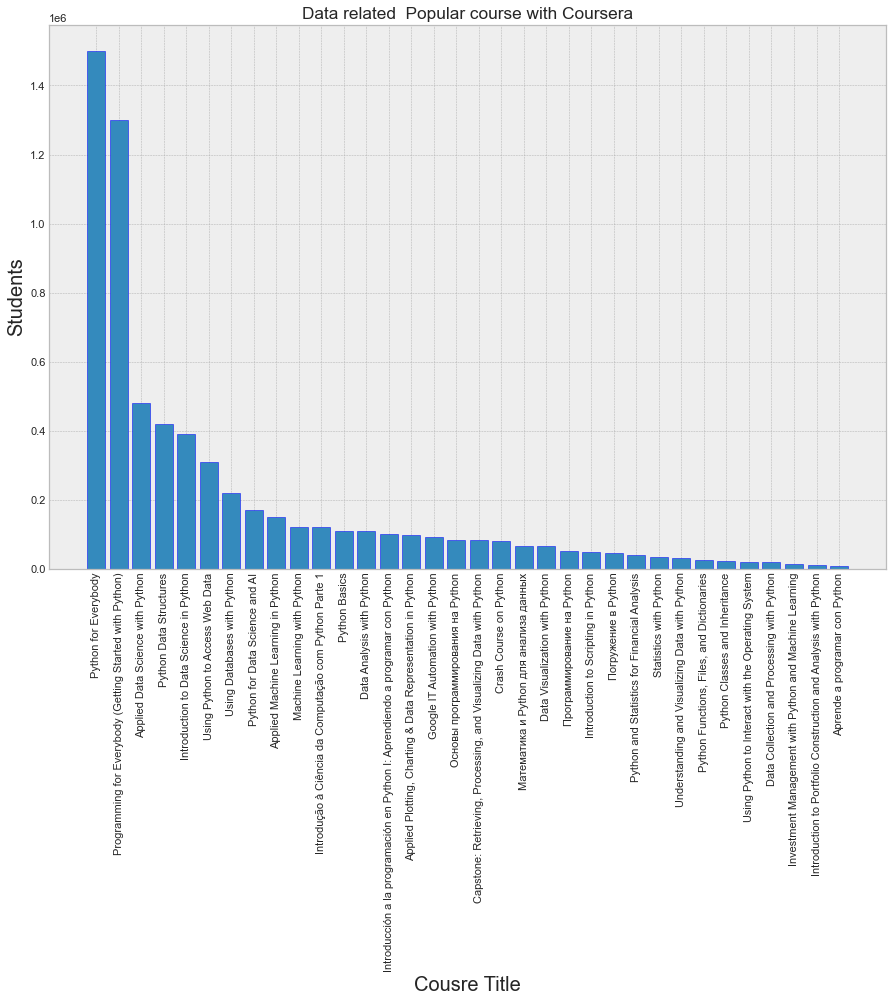

In [588]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfp['course_title'],dfp['course_students_enrolled'], edgecolor='blue')
plt.title('Data related  Popular course with Coursera')
plt.xlabel("Cousre Title", fontsize=20)
plt.ylabel('Students', fontsize=20)
plt.show

In [589]:
# All start with the form 'M'(Uppercase). Sort courses containing 'Machine' by 'enrolled'
dfml=mydf[mydf['course_title'].str.contains('Machine')].sort_values(by=['course_students_enrolled'], ascending=False)
dfml.head(5)

course_id                                       course_title  \
564          6                                   Machine Learning   
563        181                                   Machine Learning   
565        831  Machine Learning Foundations: A Case Study App...   
763        189              Structuring Machine Learning Projects   
200        148      Data Science: Statistics and Machine Learning   

          course_organization course_Certificate_type  course_rating  \
564       Stanford University                  COURSE            4.9   
563  University of Washington          SPECIALIZATION            4.6   
565  University of Washington                  COURSE            4.6   
763           deeplearning.ai                  COURSE            4.8   
200  Johns Hopkins University          SPECIALIZATION            4.4   

    course_difficulty  course_students_enrolled  
564             Mixed                   3200000  
563      Intermediate                    290000  
565             Mixed                    240000  
763          Beginner                    220000  
200      Intermediate                    210000

<function matplotlib.pyplot.show(close=None, block=None)>

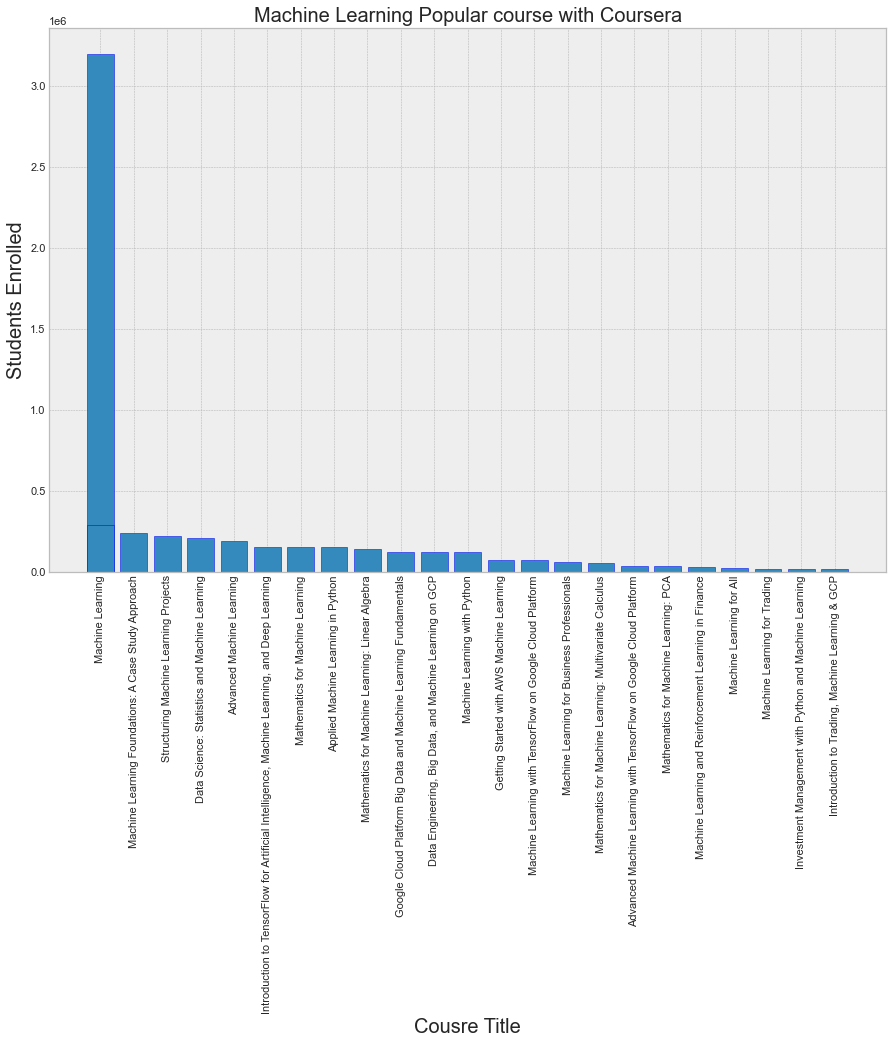

In [590]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfml['course_title'],dfml['course_students_enrolled'], edgecolor='blue')
plt.title('Machine Learning Popular course with Coursera', fontsize=20)
plt.xlabel('Cousre Title', fontsize=20)
plt.ylabel('Students Enrolled', fontsize=20)
plt.show

In [591]:
# All start with the form 'M'(Uppercase). Sort courses containing 'Management' by 'enrolled'
dfm=mydf[mydf['course_title'].str.contains('Management')].sort_values(by=['course_students_enrolled'], ascending=False)
dfm.head(5)

course_id                                       course_title  \
678         31  Project Management & Other Tools for Career De...   
679         30        Project Management Principles and Practices   
232         53                         Digital Product Management   
351         77    Fundamentals of Project Planning and Management   
574         73         Management of Fashion and Luxury Companies   

                  course_organization course_Certificate_type  course_rating  \
678  University of California, Irvine          SPECIALIZATION            4.6   
679  University of California, Irvine          SPECIALIZATION            4.7   
232            University of Virginia          SPECIALIZATION            4.7   
351            University of Virginia                  COURSE            4.7   
574                Università Bocconi                  COURSE            4.7   

    course_difficulty  course_students_enrolled  
678          Beginner                    440000  
679          Beginner                    230000  
232          Beginner                    140000  
351          Beginner                    120000  
574             Mixed                    120000

<function matplotlib.pyplot.show(close=None, block=None)>

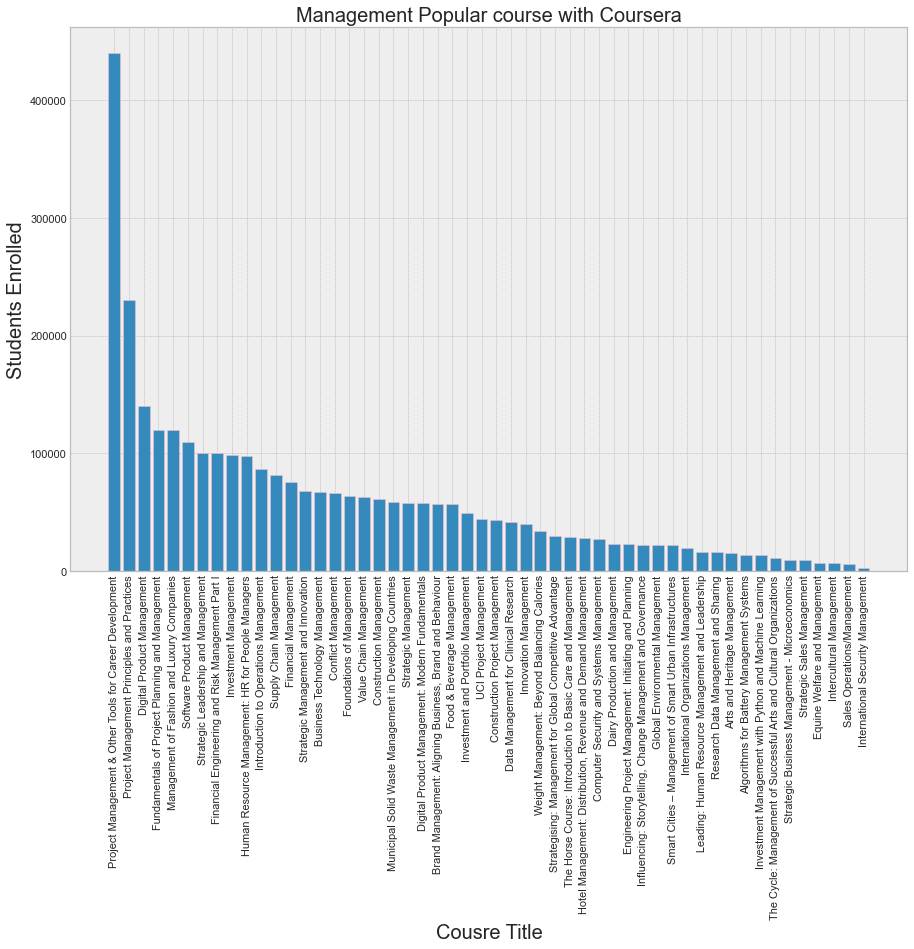

In [592]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfm['course_title'],dfm['course_students_enrolled'], edgecolor='pink')
plt.title('Management Popular course with Coursera', fontsize=20)
plt.xlabel('Cousre Title', fontsize=20)
plt.ylabel('Students Enrolled', fontsize=20)
plt.show

In [593]:
# All start with the form 'P'(Uppercase). Sort courses containing 'Programing' by 'enrolled'
dfp=mydf[mydf['course_title'].str.contains('Programming ')].sort_values(by=['course_students_enrolled'], ascending=False)
dfp

course_id                                       course_title  \
674         47  Programming for Everybody (Getting Started wit...   
535         45  Java Programming and Software Engineering Fund...   
633         86                Object Oriented Programming in Java   
43         151  An Introduction to Programming the Internet of...   
511        308            Introduction to Programming with MATLAB   
672        364  Programming Foundations with JavaScript, HTML ...   
341        150                    Functional Programming in Scala   
340        790         Functional Programming Principles in Scala   
510        190                   Introduction to Programming in C   
123        222          C# Programming for Unity Game Development   
122        662           C for Everyone: Programming Fundamentals   
645        445  Parallel, Concurrent, and Distributed Programm...   
673        732                           Programming Fundamentals   
675        208                         Programming with Google Go   

                          course_organization course_Certificate_type  \
674                    University of Michigan                  COURSE   
535                           Duke University          SPECIALIZATION   
633                           Duke University          SPECIALIZATION   
43           University of California, Irvine          SPECIALIZATION   
511                     Vanderbilt University                  COURSE   
672                           Duke University                  COURSE   
341  École Polytechnique Fédérale de Lausanne          SPECIALIZATION   
340  École Polytechnique Fédérale de Lausanne                  COURSE   
510                           Duke University          SPECIALIZATION   
123             University of Colorado System          SPECIALIZATION   
122      University of California, Santa Cruz                  COURSE   
645                           Rice University          SPECIALIZATION   
673                           Duke University                  COURSE   
675          University of California, Irvine          SPECIALIZATION   

     course_rating course_difficulty  course_students_enrolled  
674            4.8             Mixed                   1300000  
535            4.6          Beginner                    380000  
633            4.6          Beginner                    330000  
43             4.6          Beginner                    270000  
511            4.8          Beginner                    270000  
672            4.6          Beginner                    250000  
341            4.7      Intermediate                    220000  
340            4.8      Intermediate                    170000  
510            4.7          Beginner                     82000  
123            4.7          Beginner                     36000  
122            4.5          Beginner                     31000  
645            4.5      Intermediate                     30000  
673            4.7          Beginner                     19000  
675            4.6      Intermediate                     18000

<function matplotlib.pyplot.show(close=None, block=None)>

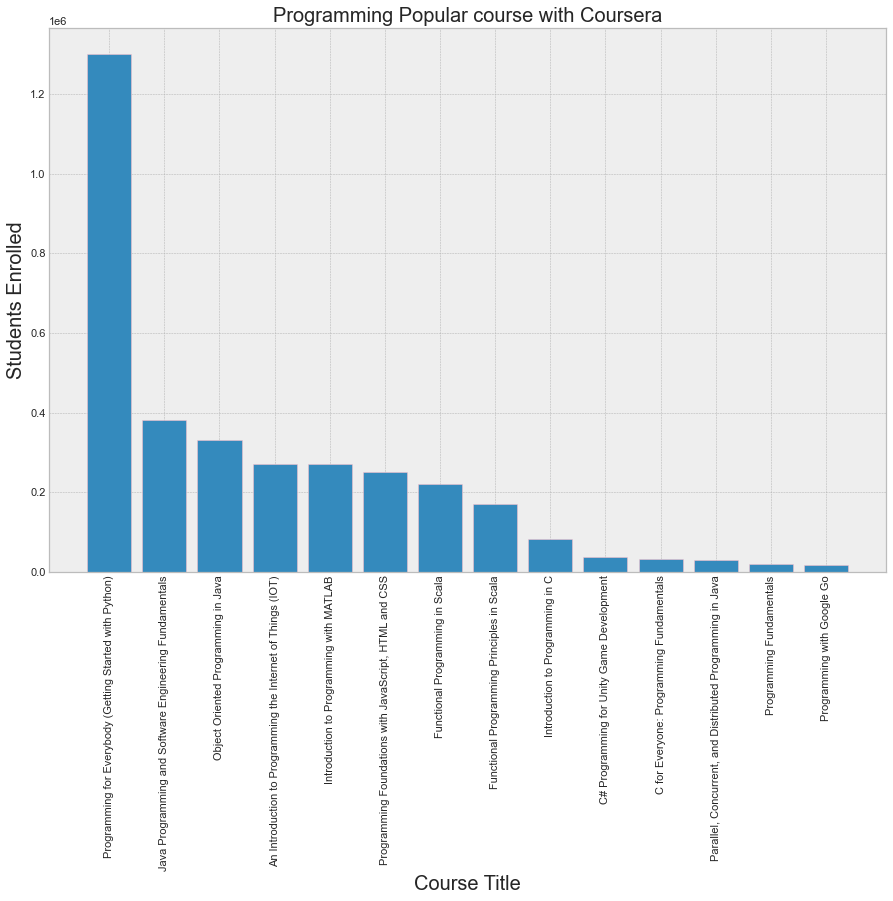

In [594]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfp['course_title'],dfp['course_students_enrolled'], edgecolor='pink')
plt.title('Programming Popular course with Coursera', fontsize=20)
plt.xlabel('Course Title', fontsize=20)
plt.ylabel('Students Enrolled', fontsize=20)
plt.show

In [595]:
# All start with the form Business by 'enrolled'
dfb=mydf[mydf['course_title'].str.contains('business' )].sort_values(by=['course_students_enrolled'], ascending=False).head(10)
dfb

course_id                                       course_title  \
219        430  Design-Led Strategy: Design thinking for busin...   
240        624  Driving business towards the Sustainable Devel...   

              course_organization course_Certificate_type  course_rating  \
219      The University of Sydney                  COURSE            4.6   
240  Erasmus University Rotterdam                  COURSE            4.8   

    course_difficulty  course_students_enrolled  
219      Intermediate                     19000  
240          Beginner                      5600

<function matplotlib.pyplot.show(close=None, block=None)>

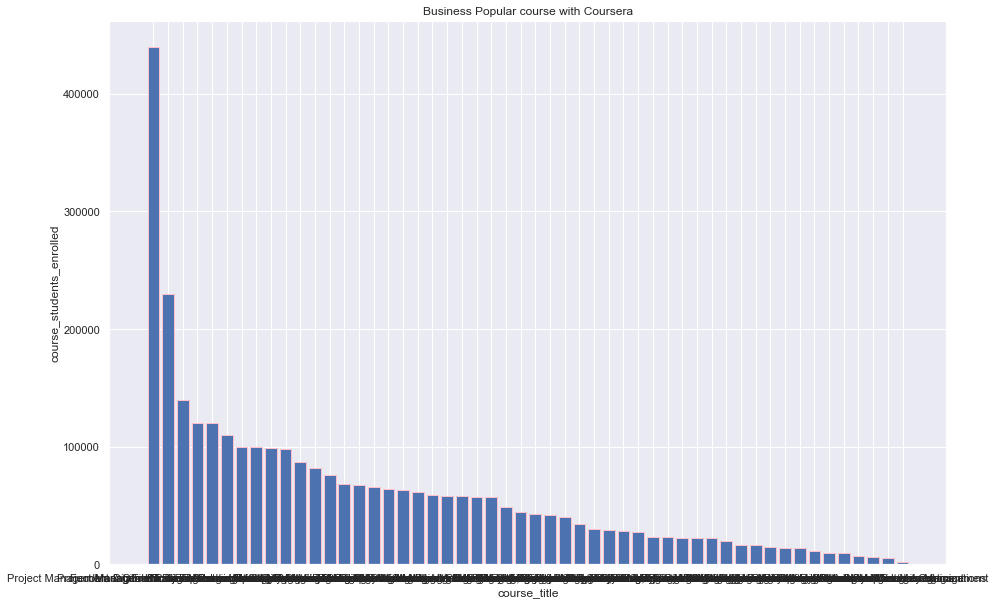

In [234]:
fig = plt.figure(figsize =(15,10))
#plt.xticks(rotation='vertical')
plt.bar(dfm['course_title'],dfm['course_students_enrolled'], edgecolor='pink')
plt.title('Business Popular course with Coursera')
plt.xlabel('course_title')
plt.ylabel('course_students_enrolled')
plt.show

<AxesSubplot:xlabel='difficulty_level', ylabel='count'>

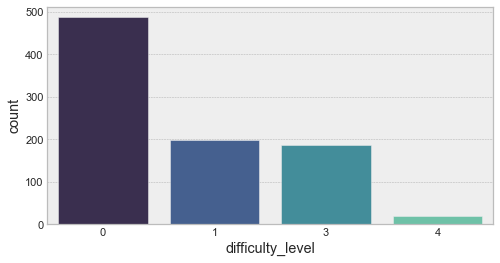

In [596]:
#mapping levels for difficulty
mydf['difficulty_level']=mydf.course_difficulty.map({'Beginner':0,'Intermediate':1,'Mixed':3,'Advanced':4})
sns.countplot('difficulty_level',data=mydf,palette='mako')

In [680]:
#plot difficulty level and course rating
sns.regplot(x="difficulty_level", y="course_rating", data=mydf,line_kws={"color":"green"})

KeyError: 'difficulty_level'

In [679]:
sns.barplot('difficulty_level','course_students_enrolled',data=mydf,palette='viridis')

ValueError: Could not interpret input 'difficulty_level'

### Does most popular course have higher rating: 
>- It is obeserved from the following scatter plot that high rating courses are enrolled by most of the students
>- Definately It can be analysed why this courses are popular or what makes them popular

In [678]:
#Does most popular course have higher ratings?
fig = px.scatter(mydf, x="course_students_enrolled", y="course_rating", trendline ="ols")
fig.update_layout(title="Number of students and course ratings",
                 xaxis_title="Number of students",
                 yaxis_title="Rating"
                 )
fig.show()
plt.show()

### Does highest rating courses have more students enrolled
>- It is observed from the following finding that yes, overall most students chose to enroll themselves mostly rating range range (4.6 to 4.8). So it is some extent it can be said that yes, overll hogh rated course has better enrolments. And again it can argubale that there are some cousre has 5 rated course, but the number of enrolment students are far low compared to Machine learning and pyhon. Now next part we will see that what are most highest rating courses and their enrolled students.

In [599]:
#Does highest ratings have more students?
fig = px.scatter(mydf, x="course_rating", y="course_students_enrolled", trendline="ols")
fig.update_layout(title="Course ratings and number of students",
                 xaxis_title="Rating",
                 yaxis_title="Number of students"
                 )
fig.show()
plt.show()

### From this above analysis it can said, 

<AxesSubplot:title={'center':'course difficulty distribution based on rating and Certificate type'}, xlabel='course_difficulty', ylabel='course_rating'>

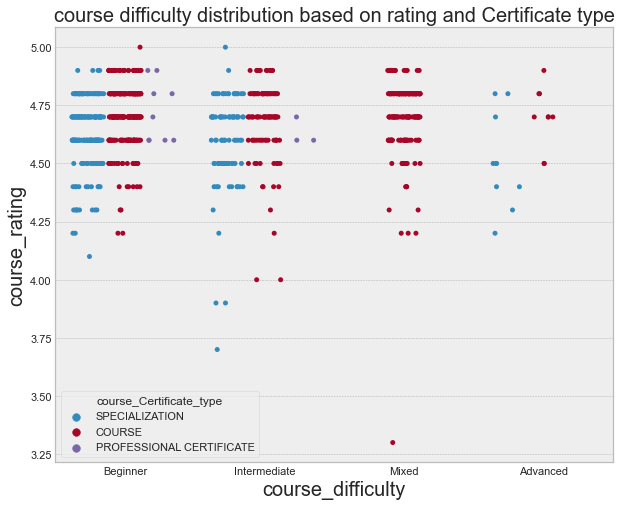

In [604]:
# The bigenner for exmaple the normal courses have most rate and number of courses than other and professional
#have high rate also but lower number of courses

plt.figure(figsize = [10,8])
plt.title("course difficulty distribution based on rating and Certificate type",fontsize =20)
plt.xlabel("COURSE-RATING", fontsize =20)
plt.ylabel("Course Difficulty", fontsize =20)
sns.stripplot(data = mydf , x = 'course_difficulty',y = 'course_rating', hue = 'course_Certificate_type',jitter = 0.35 , dodge = True)

In [605]:
px.box(mydf, x='course_Certificate_type', y='course_rating')

In [606]:
filter_df = mydf[mydf.course_Certificate_type=='SPECIALIZATION']
px.box(filter_df, x='course_difficulty', y='course_rating')

In [607]:
filter_df = mydf[mydf.course_Certificate_type=='COURSE']
px.box(filter_df, x='course_difficulty', y='course_rating')

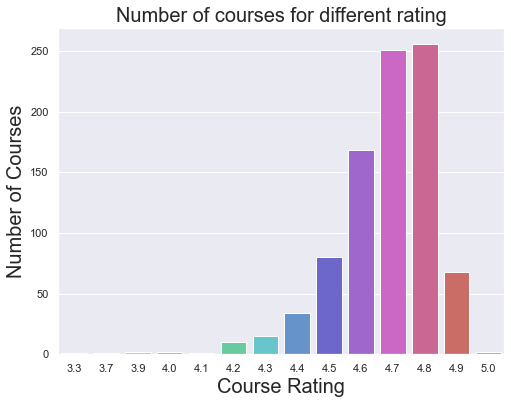

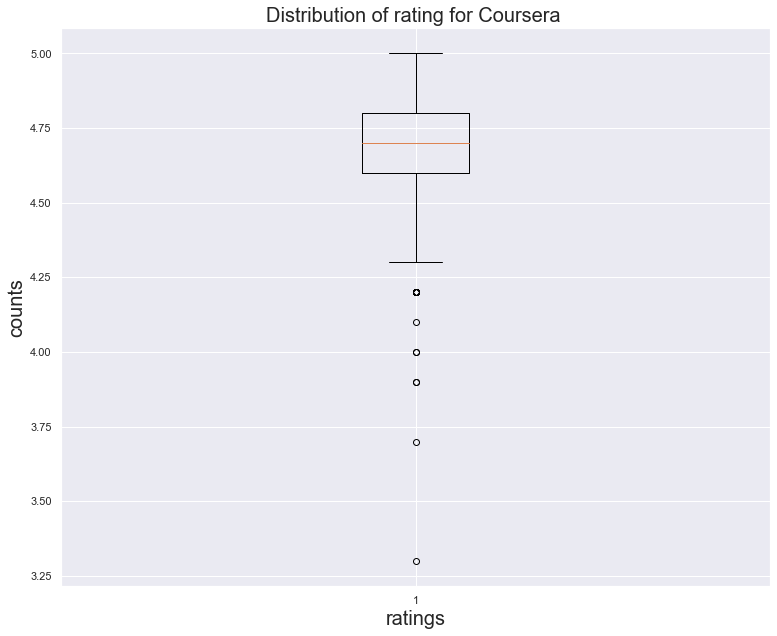

In [357]:
#Number of courses for different rating
P=sns.color_palette("hls",12)
plt.figure(figsize=(8,6)) 
sns.countplot(x='course_rating',palette=P, data=mydf)
plt.xlabel('Course Rating', fontsize =20)
plt.ylabel('Number of Courses', fontsize =20)
plt.title('Number of courses for different rating', fontsize =20)
plt.show()
# Distribution of Course rating
plt.boxplot(data =mydf,x = 'course_rating');
plt.xlabel("ratings", fontsize =20)
plt.ylabel("counts", fontsize=20)
plt.title("Distribution of rating for Coursera ", fontsize =20);

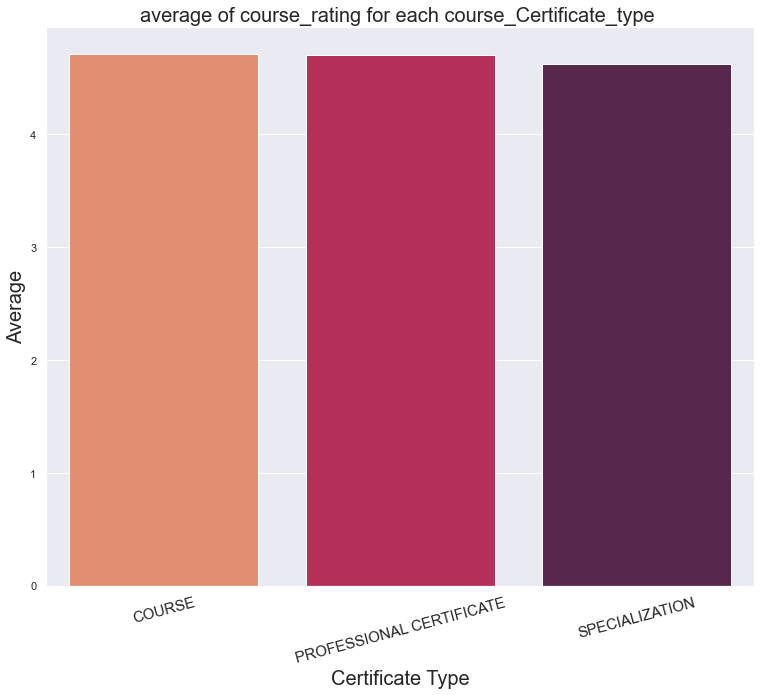

In [672]:
palette = ['rocket_r','viridis','magma','crest']


def my_plot():
    cat_data = ['course_Certificate_type' , 'course_difficulty']
    num_data = ['course_rating','course_students_enrolled']
    pal_index = 0
    for i in num_data:
        for j in cat_data:
            avg = mydf.groupby(j)[i].mean().reset_index(name = 'avg')
            sns.barplot(data = avg , x = j , y = 'avg' , palette = palette[pal_index])
            plt.xticks(size=15, rotation = 15)
            plt.xlabel("Certificate Type", fontsize=20)
            plt.ylabel("Average", fontsize=20)
            plt.title("average of {} for each {} ".format(i,j), fontsize=20);
            pal_index +=1
            yield
            
myplot = my_plot()
next(myplot)

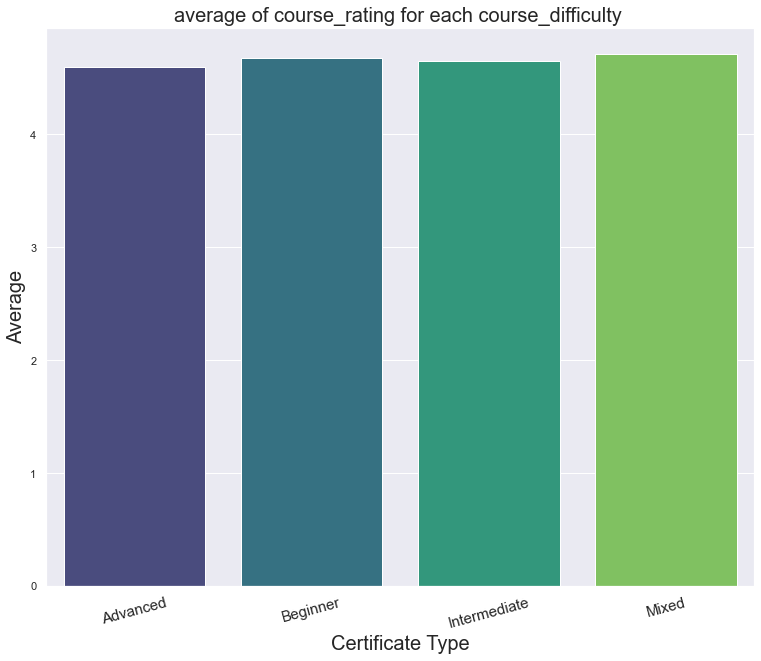

In [673]:
next(myplot)

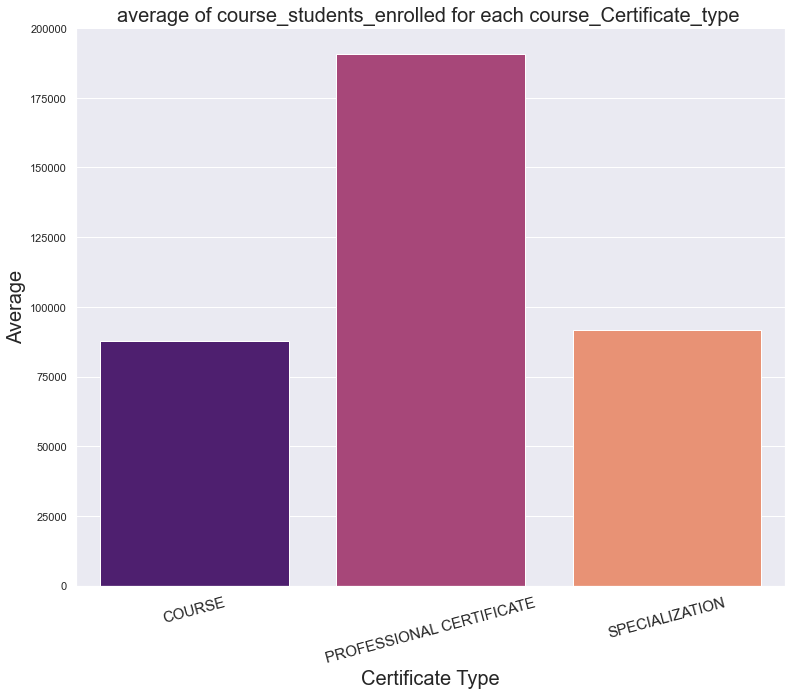

In [674]:
next(myplot)

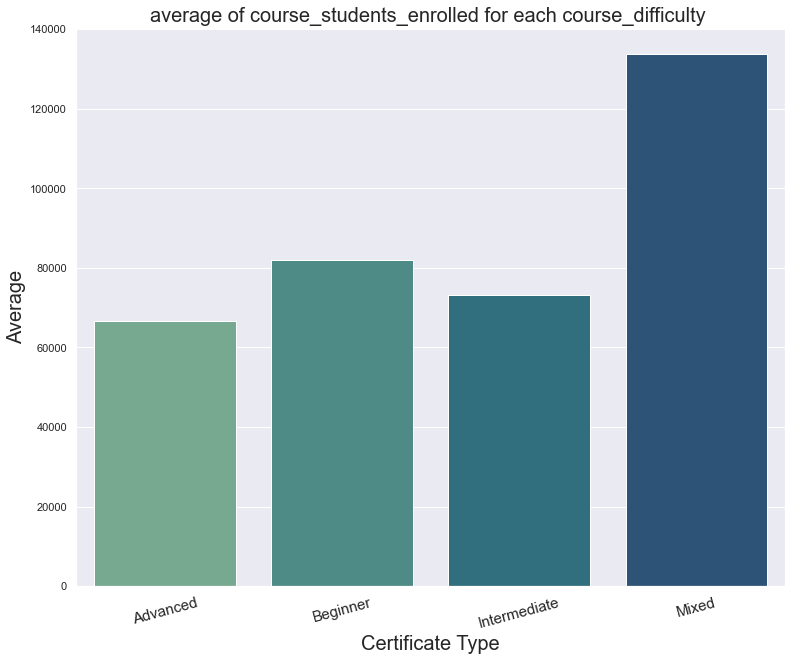

In [675]:
next(myplot)

In [676]:
#next(myplot)

In [615]:
fig=px.scatter(mydf, x='course_students_enrolled', y='course_rating', color='course_difficulty', trendline ="ols",width=700, height=400,
               labels={
                     "course_students_enrolled": "Enrolled Students",
                     "course_rating": "Rating"},
                title="Students enrolled based on rating and difficulty")
fig.add_annotation(x=3200000, y=4.9,
            text="Mixed",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=1500000, y=4.689475,
            text="Beginner",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=320000, y=4.54255,
            text="Advanced",
            showarrow=True,
            arrowhead=1)


fig.show()


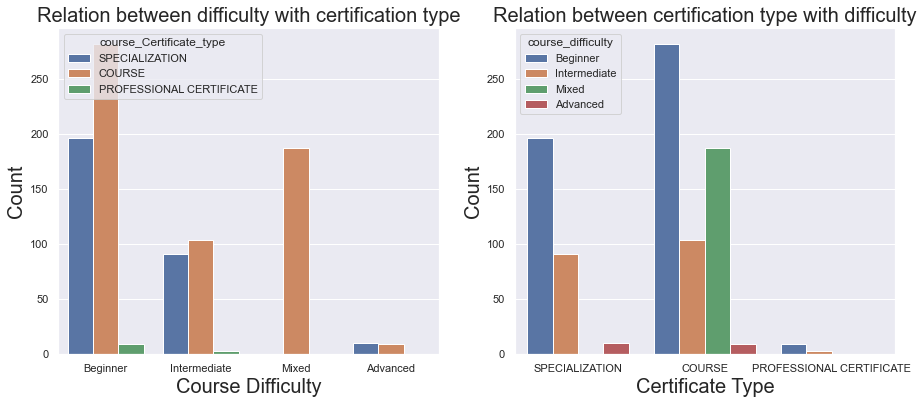

In [671]:
figure, ax =plt.subplots(1,2, figsize= (15,6))
sns.countplot(mydf['course_difficulty'], ax=ax[0], hue=mydf['course_Certificate_type'])
ax[0].set_title("Relation between difficulty with certification type", fontsize=20)
ax[0].set_xlabel("Course Difficulty", fontsize=20)
ax[0].set_ylabel("Count", fontsize=20)

sns.countplot(mydf['course_Certificate_type'], ax=ax[1], hue=mydf['course_difficulty'])
ax[1].set_title("Relation between certification type with difficulty", fontsize=20)
ax[1].set_xlabel("Certificate Type", fontsize=20)
ax[1].set_ylabel("Count", fontsize=20)
figure.show()

In [616]:
# the total students enrolled for each course difficulty category
vin = pd.DataFrame({'total_students_enrolled' : mydf.groupby('course_difficulty').sum()['course_students_enrolled']}).reset_index()
vin

course_difficulty  total_students_enrolled
0          Advanced                  1264400
1          Beginner                 39921800
2      Intermediate                 14506300
3             Mixed                 24989400

In [617]:
# Total Courses by their Certification Type and Difficulty in coursera
course_type = mydf['course_Certificate_type'].value_counts().reset_index()
course_type

index  course_Certificate_type
0                    COURSE                      582
1            SPECIALIZATION                      297
2  PROFESSIONAL CERTIFICATE                       12

In [618]:
#Course difficulty in Coursera Beginner,Intermediate,,Mixed,Advanced
course_diff = mydf['course_difficulty'].value_counts().reset_index()
course_diff

index  course_difficulty
0      Beginner                487
1  Intermediate                198
2         Mixed                187
3      Advanced                 19

In [619]:
#Number of courses by Certification type
#Number of courses by Difficulty

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Bar(
                x = course_type['index'],
                y = course_type['course_Certificate_type'],
                name = '',
                marker = dict(color = 'yellow'),
                text=course_type['course_Certificate_type'],
),
    row=1, col=1
)
ndd= fig.add_trace(
    go.Bar(
                x = mydf['course_difficulty'].unique(),
                y = course_diff['course_difficulty'],
                name = '',
                marker = dict(color = 'green'),
                text=course_diff['course_difficulty'],
    ),
    row=1, col=2
)
fig.update_traces(textposition='outside')
fig.update_layout(
    showlegend=False, 
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    title_font_size=22,
)
fig.show()


####
#Number of courses by certification type
#Number of courses by difficulty

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Pie(
                values = course_type['course_Certificate_type'],
                labels = course_type['index'],
),
    row=1, col=1
)
ndd = fig.add_trace(
    go.Pie(
                values = course_diff['course_difficulty'],
                labels = course_diff['index'],
    ),
    row=1, col=2
)
fig.update_layout(legend=dict(orientation="h"))
fig.show()

Text(0, 0.5, 'Count')

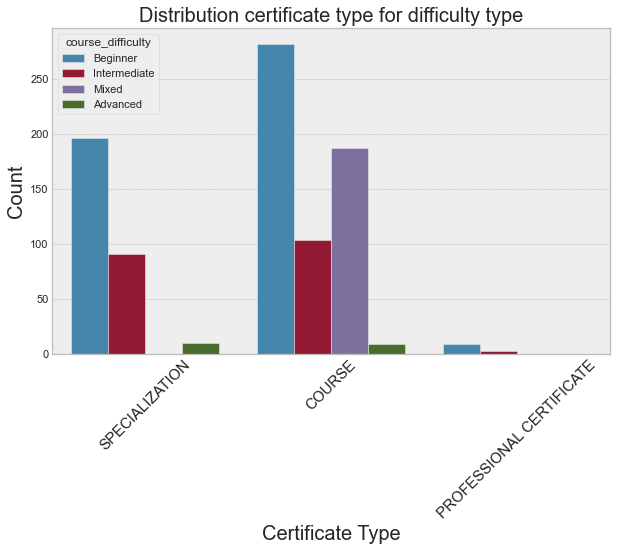

In [621]:
# Certification type for each difficulty
#The normal course include the four type of difficulty (Begineer,Intermediate,Advance,Mixed)
#Professional have Beginner and Intemediate only and have a small number of these types
#finally specialization have 3 difficulty type(Begineer,Intermediate,Advance)
fig=plt.figure(figsize=(10,6))
sns.countplot(data = mydf , x = 'course_Certificate_type' , hue = 'course_difficulty')
plt.xticks(size=15, rotation =45)
plt.title("Distribution certificate type for difficulty type", fontsize=20)
plt.xlabel("Certificate Type", fontsize=20)
plt.ylabel("Count", fontsize=20)

Text(0.5, 1.0, 'Courses based on the course rating attribute\n')

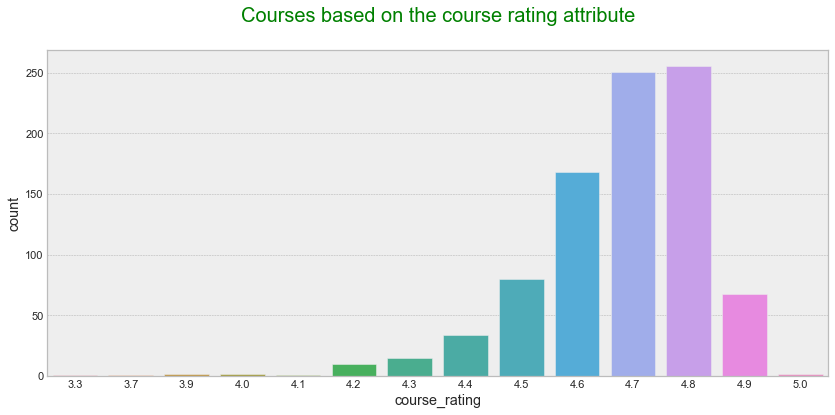

In [622]:
# The distribution of courses based on the course rating attribute
# We can observe that most courses have ratings in the range: 4.6 to 4.8
# with almost 250 courses having rating equal to 4.8
fig=plt.figure(figsize=(14,6))
sns.countplot(x='course_rating',data=mydf)
plt.title('Courses based on the course rating attribute\n',fontsize=20,color='green')


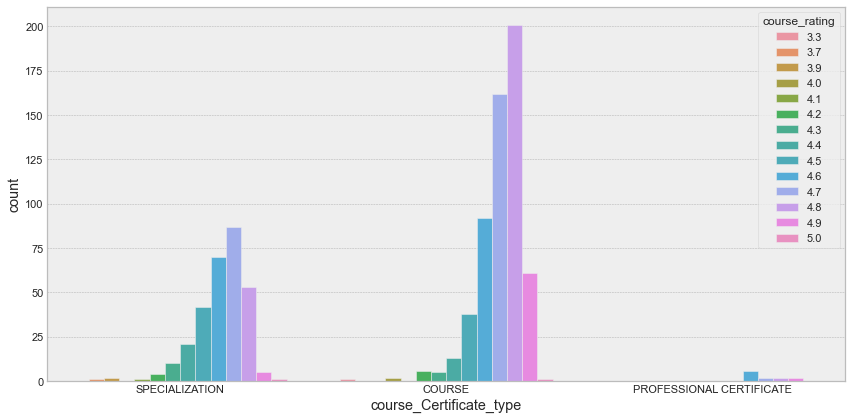

In [623]:
fig=plt.figure(figsize=(12,6))
sns.countplot('course_Certificate_type',data=mydf,hue='course_rating' )
plt.tight_layout()
plt.show()

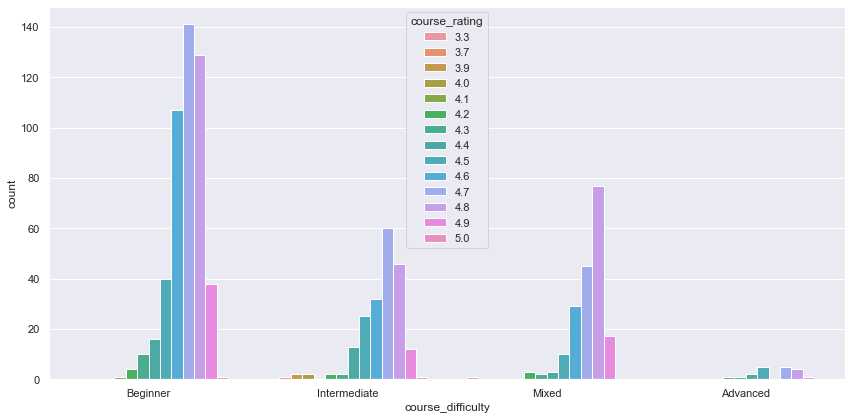

In [367]:
fig=plt.figure(figsize=(12,6))
sns.countplot('course_difficulty',data=mydf,hue='course_rating' )
plt.tight_layout()
plt.show()

In [624]:
#Number of Students each Course Lavel
level_df = pd.DataFrame(mydf.groupby('course_difficulty')['course_students_enrolled'].sum())
level_df = level_df.reset_index()

In [625]:
fig = px.bar(level_df.sort_values(by='course_students_enrolled',ascending=False), x="course_difficulty", y="course_students_enrolled", color='course_difficulty')
fig.update_layout(title_text="Number of students each course level",
                 xaxis_title="Level",
                 yaxis_title="Count")
fig.show()

In [369]:
# Unique course title in Coursera Dataset
course_title1=mydf.course_title.unique()

# Total number of unique courses
print("No. of unique courses:",mydf['course_title'].nunique())

# Totalnumber of unique course organizations
print("No. of unique course organizations:",mydf['course_organization'].nunique())

print(course_title1) # print the unique titles

No. of unique courses: 888
No. of unique course organizations: 154
['(ISC)² Systems Security Certified Practitioner (SSCP)'
 'A Crash Course in Causality:  Inferring Causal Effects from Observational Data'
 'A Crash Course in Data Science' "A Law Student's Toolkit"
 'A Life of Happiness and Fulfillment'
 'ADHD: Everyday Strategies for Elementary Students' 'AI For Everyone'
 'AI For Medical Treatment' 'AI Foundations for Everyone'
 'AI for Medical Diagnosis' 'AI for Medical Prognosis' 'AI for Medicine'
 'AWS Fundamentals' 'AWS Fundamentals: Addressing Security Risk'
 'AWS Fundamentals: Building Serverless Applications'
 'AWS Fundamentals: Going Cloud-Native'
 'AWS Fundamentals: Migrating to the Cloud'
 'Aboriginal Worldviews and Education' 'Academic English: Writing'
 'Accelerated Computer Science Fundamentals' 'Access Controls'
 'Accounting Analytics' 'Accounting for Decision Making'
 'Achieving Personal and Professional Success'
 'Actualización en el manejo del paciente con diabetes m

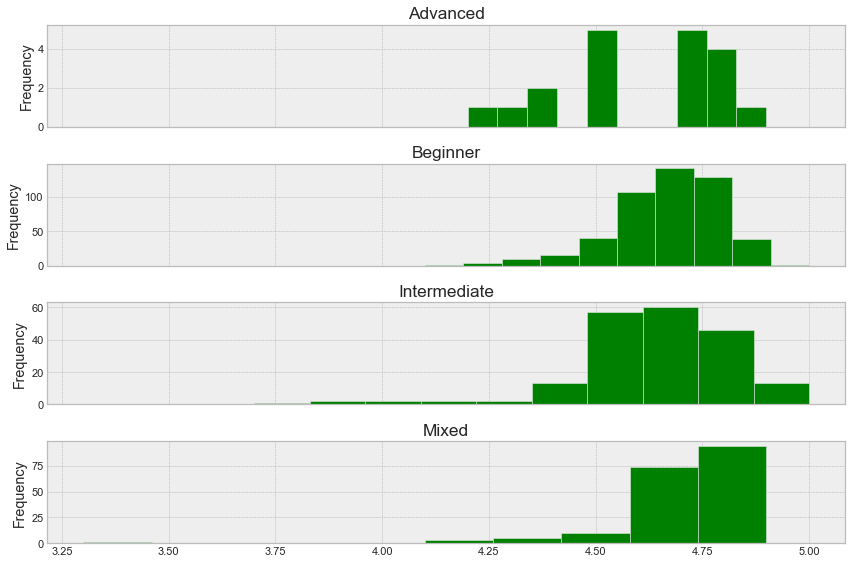

In [626]:
#Rating Distribution per course diffculty
#Advanced courses' rating has some ups-and downs; maybe due to low frequency.
#Beginner course has distribution quite similiar to total rating chart.
#Intermidiate course's rating top is not as sharp of others, that may say - 
#as the participants has some knowledge on the topic, they can judge better and being critical.
s = mydf.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(s.ngroups, sharex=True, figsize=(12, 8),)

for i, (type,rating) in enumerate(s):
    ax = rating.plot.hist('course_rating',ax=axes[i],color="green", legend=False,title=type)
fig.tight_layout()

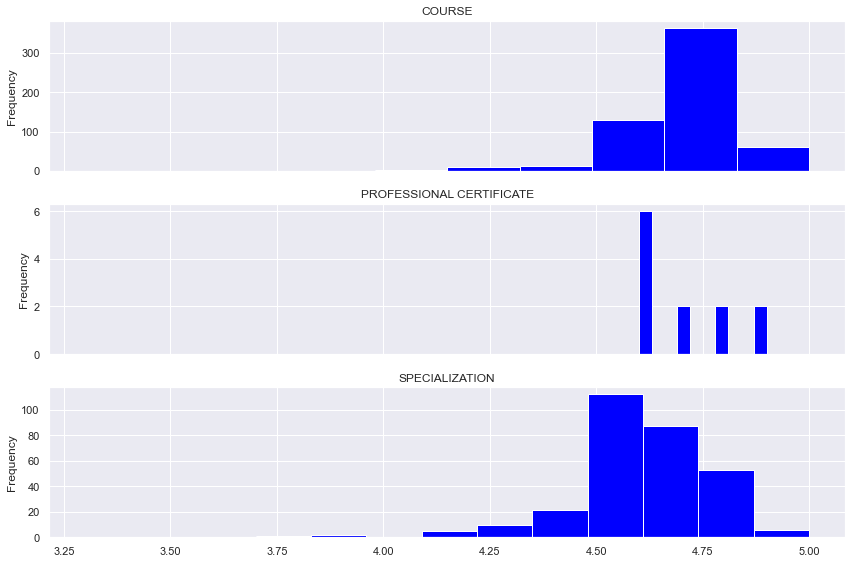

In [293]:
#Rating distribution per course type :

s = mydf.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(s.ngroups, sharex=True, figsize=(12, 8))

for i, (type,rating) in enumerate(s):
    ax = rating.plot.hist('course_rating',ax=axes[i],color='blue', legend=False,title=type,bins=10)
fig.tight_layout()


In [627]:
#Specializations has lower mean value than courses, but the distribution is interesting.
#specialization has good distribution values on right,
# normal courses are on left.

s.describe()

count      mean       std  min  25%  50%   75%  max
course_difficulty                                                     
Advanced            19.0  4.600000  0.194365  4.2  4.5  4.7  4.75  4.9
Beginner           487.0  4.680903  0.141947  4.1  4.6  4.7  4.80  5.0
Intermediate       198.0  4.646465  0.188939  3.7  4.6  4.7  4.80  5.0
Mixed              187.0  4.708556  0.170803  3.3  4.6  4.8  4.80  4.9

In [371]:
# Python' courses that 100,000 or more students enrolled in all University/Organisation  in Courera 
Python_Courses = mydf[mydf['course_title'].str.contains('Python')].sort_values(by=['course_students_enrolled'], ascending=False)
Python_Courses[Python_Courses['course_students_enrolled']>100000]

course_id                                       course_title  \
688          3                               Python for Everybody   
674         47  Programming for Everybody (Getting Started wit...   
56          26                   Applied Data Science with Python   
684        111                             Python Data Structures   
487        187             Introduction to Data Science in Python   
850        199                    Using Python to Access Web Data   
849        350                        Using Databases with Python   
687        152                     Python for Data Science and AI   
57         630                 Applied Machine Learning in Python   
570        321                       Machine Learning with Python   
530        866  Introdução à Ciência da Computação com Python ...   
682        279                                      Python Basics   
188        277                          Data Analysis with Python   

           course_organization course_Certificate_type  course_rating  \
688     University of Michigan          SPECIALIZATION            4.8   
674     University of Michigan                  COURSE            4.8   
56      University of Michigan          SPECIALIZATION            4.5   
684     University of Michigan                  COURSE            4.9   
487     University of Michigan                  COURSE            4.5   
850     University of Michigan                  COURSE            4.8   
849     University of Michigan                  COURSE            4.8   
687                        IBM                  COURSE            4.6   
57      University of Michigan                  COURSE            4.6   
570                        IBM                  COURSE            4.7   
530  Universidade de São Paulo                  COURSE            4.9   
682     University of Michigan                  COURSE            4.8   
188                        IBM                  COURSE            4.7   

    course_difficulty  course_students_enrolled  difficulty_level  
688          Beginner                   1500000                 0  
674             Mixed                   1300000                 3  
56       Intermediate                    480000                 1  
684             Mixed                    420000                 3  
487      Intermediate                    390000                 1  
850             Mixed                    310000                 3  
849             Mixed                    220000                 3  
687          Beginner                    170000                 0  
57       Intermediate                    150000                 1  
570      Intermediate                    120000                 1  
530          Beginner                    120000                 0  
682          Beginner                    110000                 0  
188          Beginner                    110000                 0

In [628]:
# 'Machine learning' Courses that 100,000 or more students enrolled in all university/Organisation  in Courera 
Machine_learning_courses = mydf[mydf['course_title'].str.contains('Machine')].sort_values(by=['course_students_enrolled'], ascending=False)
Machine_learning_courses[Machine_learning_courses['course_students_enrolled']>100000]

course_id                                       course_title  \
564          6                                   Machine Learning   
563        181                                   Machine Learning   
565        831  Machine Learning Foundations: A Case Study App...   
763        189              Structuring Machine Learning Projects   
200        148      Data Science: Statistics and Machine Learning   
28         103                          Advanced Machine Learning   
520        230  Introduction to TensorFlow for Artificial Inte...   
595         55                   Mathematics for Machine Learning   
57         630                 Applied Machine Learning in Python   
596        223   Mathematics for Machine Learning: Linear Algebra   
389        227  Google Cloud Platform Big Data and Machine Lea...   
193         24  Data Engineering, Big Data, and Machine Learni...   
570        321                       Machine Learning with Python   

                                   course_organization  \
564                                Stanford University   
563                           University of Washington   
565                           University of Washington   
763                                    deeplearning.ai   
200                           Johns Hopkins University   
28   National Research University Higher School of ...   
520                                    deeplearning.ai   
595                            Imperial College London   
57                              University of Michigan   
596                            Imperial College London   
389                                       Google Cloud   
193                                       Google Cloud   
570                                                IBM   

    course_Certificate_type  course_rating course_difficulty  \
564                  COURSE            4.9             Mixed   
563          SPECIALIZATION            4.6      Intermediate   
565                  COURSE            4.6             Mixed   
763                  COURSE            4.8          Beginner   
200          SPECIALIZATION            4.4      Intermediate   
28           SPECIALIZATION            4.5          Advanced   
520                  COURSE            4.7      Intermediate   
595          SPECIALIZATION            4.6          Beginner   
57                   COURSE            4.6      Intermediate   
596                  COURSE            4.7          Beginner   
389                  COURSE            4.6      Intermediate   
193          SPECIALIZATION            4.6      Intermediate   
570                  COURSE            4.7      Intermediate   

     course_students_enrolled  difficulty_level  
564                   3200000                 3  
563                    290000                 1  
565                    240000                 3  
763                    220000                 0  
200                    210000                 1  
28                     190000                 4  
520                    150000                 1  
595                    150000                 0  
57                     150000                 1  
596                    140000                 0  
389                    120000                 1  
193                    120000                 1  
570                    120000                 1

## Finding the number of courses for specific course title

In [629]:
def determine_count(mydf,key):
    lists=[]
    for course in mydf['course_title']:
        if key in course:
            lists.append(course)
    return len(lists)

In [630]:
#Total no of title in each category
subject = ['Machine Learning','Deep Learning','Data Analysis','Python','Reinforcement Learning','Statistics','Mathematics']

print("\t Course count")
for s in subject:
    print("\t",s,":" ,determine_count(mydf,s))

	 Course count
	 Machine Learning : 24
	 Deep Learning : 3
	 Data Analysis : 8
	 Python : 34
	 Reinforcement Learning : 3
	 Statistics : 13
	 Mathematics : 7


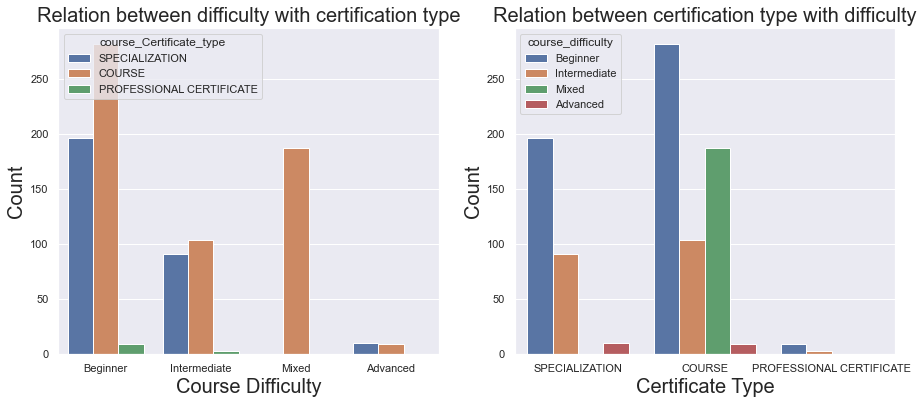

In [475]:
figure, ax =plt.subplots(1,2, figsize= (15,6))
sns.countplot(mydf['course_difficulty'], ax=ax[0], hue=mydf['course_Certificate_type'])
ax[0].set_title("Relation between difficulty with certification type", fontsize=20)
ax[0].set_xlabel("Course Difficulty", fontsize=20)
ax[0].set_ylabel("Count", fontsize=20)

sns.countplot(mydf['course_Certificate_type'], ax=ax[1], hue=mydf['course_difficulty'])
ax[1].set_title("Relation between certification type with difficulty", fontsize=20)
ax[1].set_xlabel("Certificate Type", fontsize=20)
ax[1].set_ylabel("Count", fontsize=20)
figure.show()

### Finding the number of courses by different laguages

In [631]:
#We see majority of courses are in English followed by distant second spanish,
#third is french, and 4th is italian, 5th is german and russian
!pip install langdetect
import langdetect
mydf['Language'] = mydf['course_title'].apply(lambda x: langdetect.detect(x))
mydf['Language'].value_counts()

en    721
es     48
de     16
fr     16
it     16
ru     14
nl      9
da      8
ca      7
ro      7
no      7
tl      6
pt      6
id      3
af      2
sq      1
lt      1
hu      1
cy      1
bg      1
Name: Language, dtype: int64

In [380]:
# difficulty vs enrollment vs language using boxplot
fig = px.box(mydf, x="course_difficulty", y="course_students_enrolled",color="Language")
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [632]:
#Exploring text in course title using NLTK and wordcloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from wordcloud import WordCloud
mydf['course_title_new'] = mydf['course_title'].map(lambda x: x.split())
mydf['course_title_new']=mydf['course_title_new'].apply(lambda x: [item for item in x if item not in stop_words])
mydf['course_title_new']=mydf['course_title_new'].astype(str)

In [382]:
title_count = ','.join(list(mydf['course_title_new'].values))

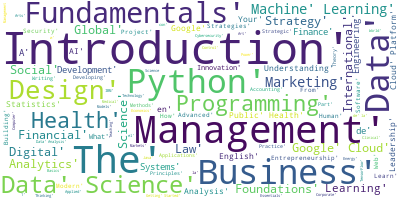

In [383]:
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(title_count)
wordcloud.to_image()

>- Python, Data are expected. We also have business, introductionand fundamentals are expected as majority of courses are beginners. We also Machine Learning and Data Science in good numbers.

In [633]:
mydf["python"]= mydf["course_title"].str.find("Python")
mydf.loc[mydf['python'] == -1, 'python_yes'] = 0
mydf.loc[mydf['python'] > -1, 'python_yes'] = 1
unv_python=mydf.groupby(['course_organization'],as_index=False).python_yes.sum()
unv_python

course_organization  python_yes
0                                          (ISC)²         0.0
1                             Amazon Web Services         0.0
2    American Institute of Business and Economics         0.0
3              American Museum of Natural History         0.0
4                        Arizona State University         0.0
..                                            ...         ...
149                             Yonsei University         0.0
150                               deeplearning.ai         0.0
151                           École Polytechnique         0.0
152      École Polytechnique Fédérale de Lausanne         0.0
153                     École des Ponts ParisTech         0.0

[154 rows x 2 columns]

In [479]:
unv_python.sort_values(by='python_yes',ascending=False)

course_organization  python_yes
135                      University of Michigan        16.0
38                                          IBM         4.0
32                                       Google         3.0
22                        EDHEC Business School         2.0
21                  E-Learning Development Fund         1.0
..                                          ...         ...
53                              Lund University         0.0
54   Luther College at the University of Regina         0.0
55                         Macquarie University         0.0
57                                    MathWorks         0.0
153                   École des Ponts ParisTech         0.0

[154 rows x 2 columns]

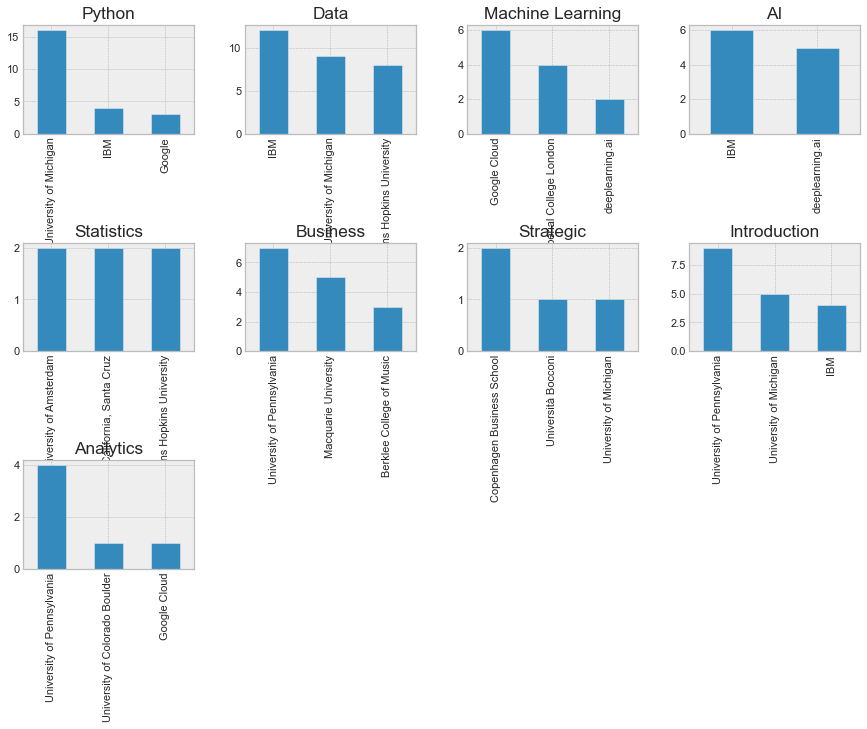

In [634]:
# key_words & orgnazations#coursera EDA
key_words=['Python','Data','Machine Learning','AI','Statistics','Business','Strategic','Introduction','Analytics']
fig=plt.figure(figsize=(15,10))
fig.set(alpha=0.2)
def pplot(j,i):
    plt.subplot(3,4,j+1)
    mydf['course_organization'][mydf['course_title'].str.contains(i)].value_counts()[:3].plot(kind='bar')
    plt.xticks(rotation=90)
    plt.title(i) 
    plt.subplots_adjust(hspace=1, wspace=0.3)
    
for j,i in enumerate(key_words):
    pplot(j,i)

#### Check again

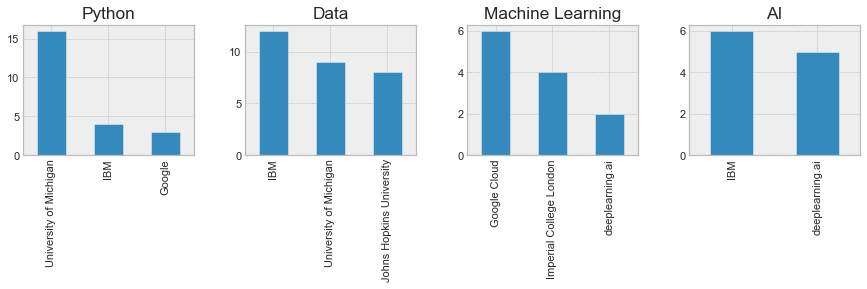

In [150]:
# key_words & orgnazations#coursera EDA
key_words=['Python','Data','Machine Learning','AI']
fig=plt.figure(figsize=(15,12))
fig.set(alpha=0.2)
def pplot(j,i):
    plt.subplot(3,4,j+1)
    mydf['course_organization'][mydf['course_title'].str.contains(i)].value_counts()[:3].plot(kind='bar')
    plt.xticks(rotation=90)
    plt.title(i) 
    plt.subplots_adjust(hspace=1, wspace=0.3)
    
for j,i in enumerate(key_words):
    pplot(j,i)

### Details of the course title and students enrolled

In [635]:
#Details of the Course Title ...Student enrolled
mydf=mydf[ [ "course_title","course_organization", "course_Certificate_type", "course_rating", "course_difficulty", "course_students_enrolled"] ]
print(mydf.head())


                                        course_title  \
0  (ISC)² Systems Security Certified Practitioner...   
1  A Crash Course in Causality:  Inferring Causal...   
2                     A Crash Course in Data Science   
3                            A Law Student's Toolkit   
4                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                      5300  
1      Intermediate                     17000  
2             Mixed                    130000  
3             Mixed                   

In [636]:
# course_type = mydf['course_Certificate_type'].value_counts().reset_index()
# course_type

### Which type of certificate have most courses:
>- It is obeserved form the following bar plot general courses certificate type provides most of the courses
>- And it is followed by Specialization and Proffesional

#### What words attract students to enroll
>- From this world- it will extract all the popular word found from the world cloud
>- It can be said that those words are popular

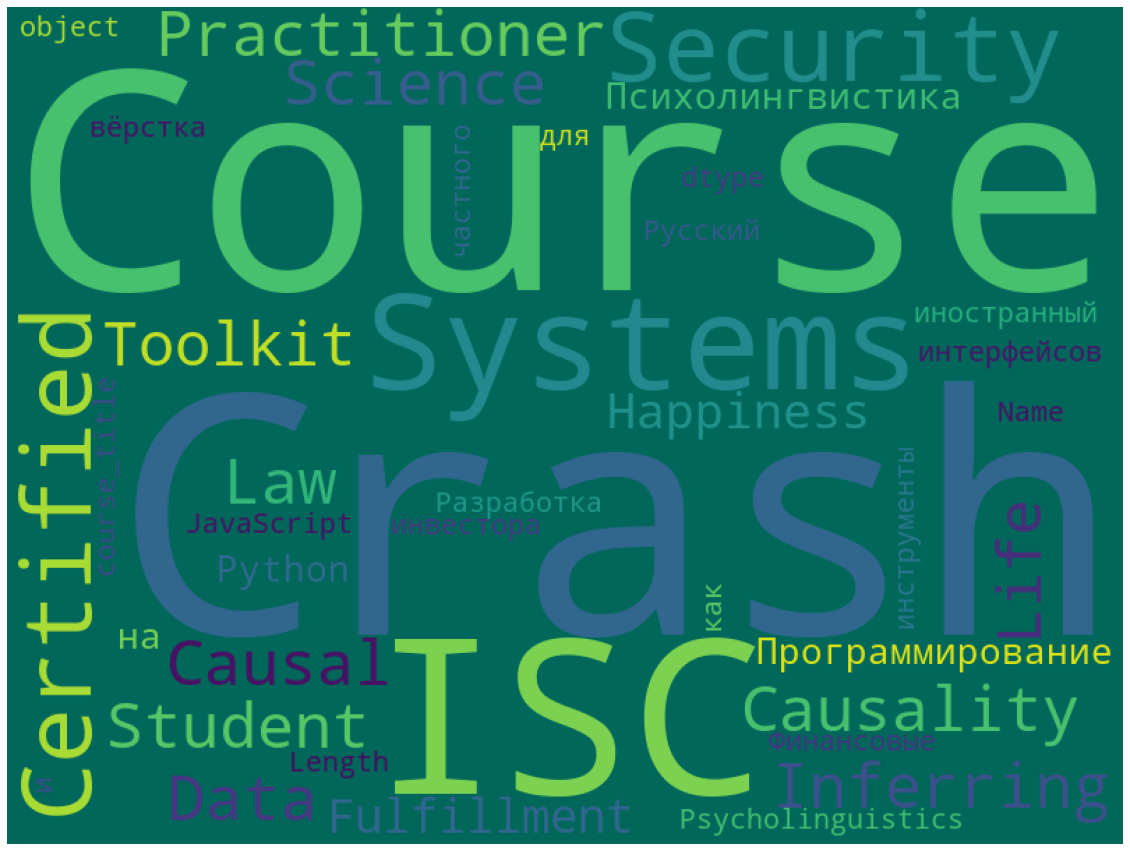

In [153]:
#A Word Cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to
#highlight popular words
#and phrases based on frequency and relevance.

#Word Cloud :To see what words attract a student to enroll the course
attract = WordCloud(width = 800, height = 600, 
            background_color ='#00675A', 
                    #Stop words are words that are filtered out before or after
                    #the natural language data (text) are processed
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(mydf['course_title']))

plt.figure(figsize = (20, 16))
plt.imshow(attract)
plt.axis("off")
plt.show()


>- it is obsered form the above plot that the number of courses by the certicate type general courses is in the top position, followed by Specialization
>- But in term of difficulty beginner courses is in the top position, follwed by intermediate, Mixed and Advanced. 

>- We can see from the above information that Machine learning is one of the top course in terms of number of students enrolled in the course. 

### Overall rating analysis depending on the number of courses

In [637]:
fig = ff.create_distplot([mydf['course_rating']],
                        ['courses'],
                         show_rug=False,
                         bin_size=0.05,
                         colors=['#188E05']
)
fig.add_vline(x=mydf['course_rating'].median(),
                  line_dash='dash',
                  line_color='#6E96D5',
                  line_width=5,
                  annotation_text='Median',
                 )
fig.add_vline(x=mydf['course_rating'].mean(),
                  line_dash='dash',
                  line_color='#455AB8',
                  line_width=5,
                  annotation_text='Mean'
                 )
fig.add_vline(x=mydf['course_rating'].mode().values[0],
                  line_dash='dash',
                  line_color='#C0D33F',
                  line_width=5,
                  annotation_text='Mode'
                 )
fig.update_layout(
        annotations=[dict(
          textangle=-60,
          y = 1.14,
          align='center',
        )],
        title_text='Ratings of Courses',
        showlegend=False,
        paper_bgcolor='rgb(248, 248, 255)',
        plot_bgcolor='rgb(200, 208, 255)',
        title_font_size=15
    )

fig.show()


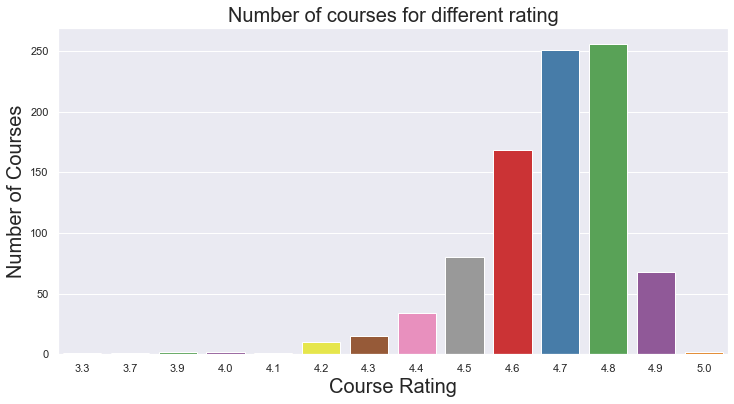

In [387]:
#Visualizing the distribution of courses based on the course rating attribute
#Number of courses for different rating
#We can observe that most courses have ratings in the range: 4.6 to 4.8
# Almost 250 courses having rating equal to 4.8
plt.figure(figsize=(12,6)) 
sns.countplot(x='course_rating',palette = "Set1",data=mydf)
plt.xlabel('Course Rating', fontsize =20)
plt.ylabel('Number of Courses', fontsize  =20)
plt.title('Number of courses for different rating', fontsize =20)
plt.show()


#### 

In [638]:
#Students Enrolled
course_level = pd.DataFrame(mydf.groupby('course_difficulty')['course_students_enrolled'].sum())

course_level= course_level.reset_index()
fig = px.bar(course_level.sort_values(by='course_students_enrolled',ascending=False), x="course_difficulty", y="course_students_enrolled", color='course_difficulty')
fig.update_layout(title_text="Number of students each Course Level",
                 xaxis_title="Level",
                 yaxis_title="Count")
fig.show()
plt.show()

### Top courses based on rating

In [639]:
#Top 10 courses based on rating
findtencourse=mydf[['course_title','course_rating']]
Tencourse = findtencourse.nlargest(10,['course_rating'])
Tencourse

course_title  course_rating
251  El Abogado del Futuro: Legaltech y la Transfor...            5.0
432                       Infectious Disease Modelling            5.0
36   Agile и Scrum в работе над проектами и продуктами            4.9
40                             American Contract Law I            4.9
61   Aprendiendo a aprender: Poderosas herramientas...            4.9
65                      Arizona State University TESOL            4.9
70   Aspectos básicos de la planificación y la gest...            4.9
82   Become a CBRS Certified Professional Installer...            4.9
98                  Boosting Creativity for Innovation            4.9
99   Brand Management: Aligning Business, Brand and...            4.9

In [158]:

#Highest rated Courses
hrc = pd.DataFrame(mydf.groupby('course_title')['course_rating'].mean())

hrc = hrc.sort_values(by='course_rating', ascending=False)[:20]

hrc = hrc.reset_index()

print(hrc)


                                         course_title  course_rating
0                        Infectious Disease Modelling            5.0
1   El Abogado del Futuro: Legaltech y la Transfor...            5.0
2                                Stories of Infection            4.9
3                  Boosting Creativity for Innovation            4.9
4   Brand Management: Aligning Business, Brand and...            4.9
5   Understanding Einstein: The Special Theory of ...            4.9
6                 Bugs 101: Insect-Human Interactions            4.9
7   Build a Modern Computer from First Principles:...            4.9
8                          Introduction to Psychology            4.9
9       Everyday Parenting: The ABCs of Child Rearing            4.9
10      Troubles du spectre de l'autisme : diagnostic            4.9
11    Formulación y evaluación de proyectos complejos            4.9
12                           Egiptología (Egyptology)            4.9
13                      Effective 

### Rating Distribution

In [640]:
#Rating Distribution
fig = px.histogram(mydf, x="course_rating")
fig.update_layout(title_text="Rating Distribution",
                 xaxis_title="Rating",
                 yaxis_title="Count")
fig.show()
plt.show()

In [641]:
#Rating distribution of each certification
plt.figure(figsize=(10,7))
fig = px.histogram(mydf, x="course_rating", color='course_Certificate_type')
fig.update_layout(title_text="Rating distribution each Certification",
                 xaxis_title="Rating",
                 yaxis_title="Count")
fig.show()

plt.show()


<Figure size 720x504 with 0 Axes>

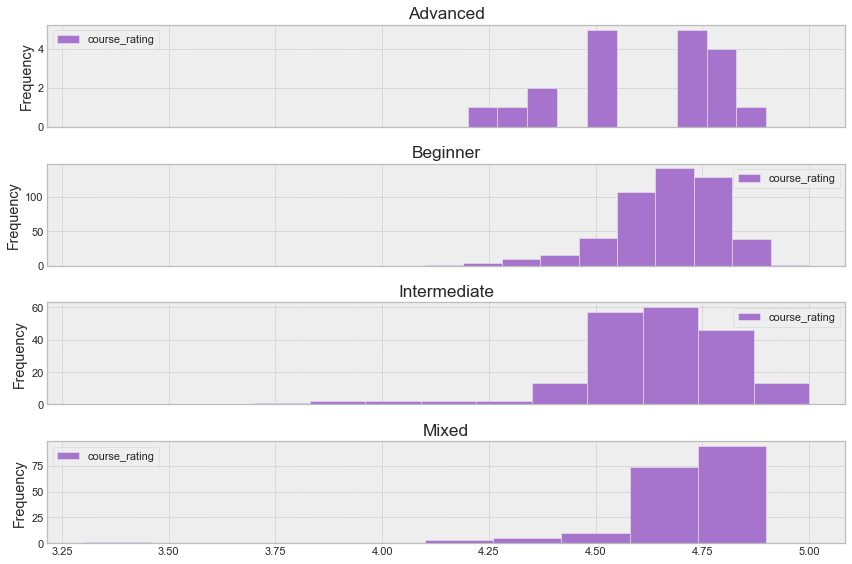

In [162]:
statistics = mydf.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(12, 8))

for i, (type,rating) in enumerate(statistics):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend= True,color="#A774CD",title=type)
fig.tight_layout()

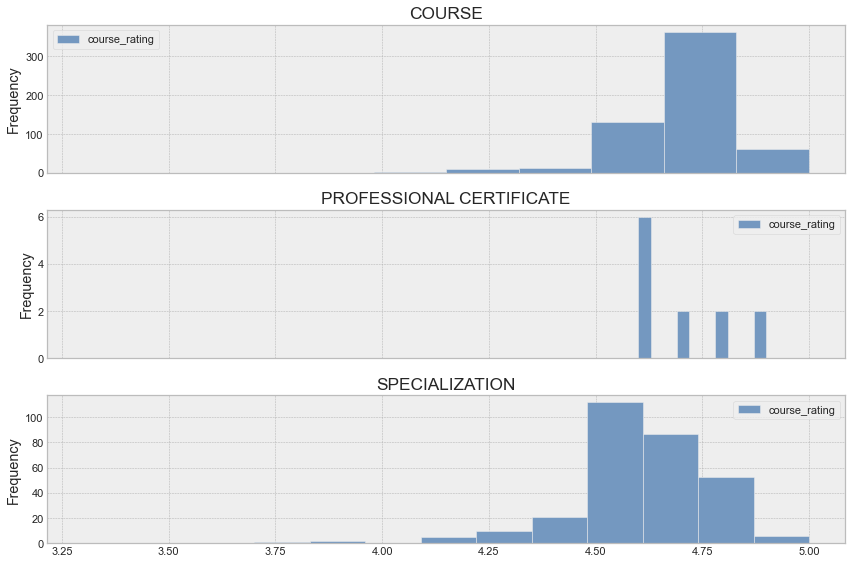

In [642]:
statistics = mydf.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(12, 8))

for i, (type,rating) in enumerate(statistics):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend= True,color="#7498C0",title=type,bins=10)
fig.tight_layout()

In [643]:
statistics = mydf.groupby('course_Certificate_type')['course_rating']
statistics.describe()

count      mean       std  min  25%   50%  75%  max
course_Certificate_type                                                      
COURSE                    582.0  4.707045  0.151647  3.3  4.6  4.70  4.8  5.0
PROFESSIONAL CERTIFICATE   12.0  4.700000  0.120605  4.6  4.6  4.65  4.8  4.9
SPECIALIZATION            297.0  4.618182  0.167874  3.7  4.5  4.60  4.7  5.0

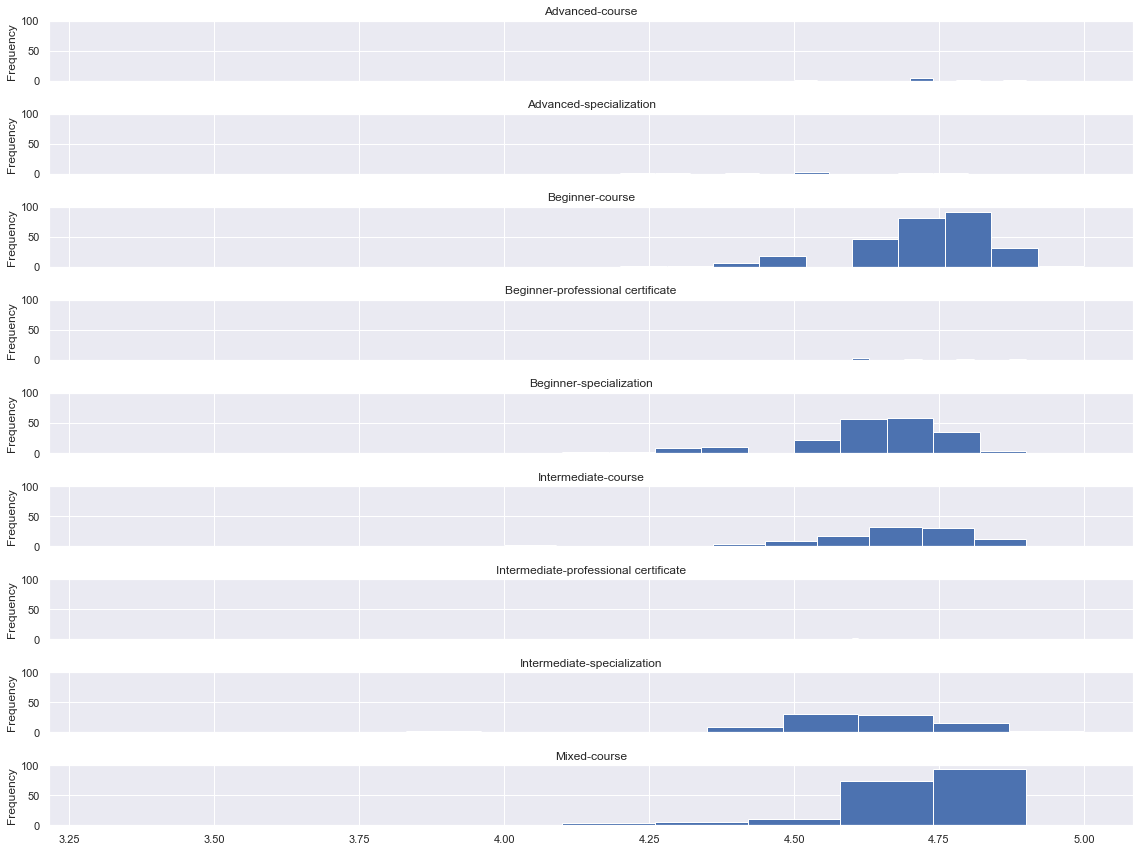

In [305]:
statistics = mydf.groupby(['course_difficulty','course_Certificate_type'])['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(16, 12))

for i, (type,rating) in enumerate(statistics):
    axes[i].set_ylim(0, 100)
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type[0]+"-"+type[1].lower(),bins=10)
fig.tight_layout()
#Mixed - Course has a unstable distribution, othes have normal distribution.

In [644]:
correlation = mydf.corr()
correlation

course_rating  course_students_enrolled
course_rating                   1.00000                   0.07109
course_students_enrolled        0.07109                   1.00000

<AxesSubplot:title={'center':'High correlation between course_rating and course_student_enrollment'}>

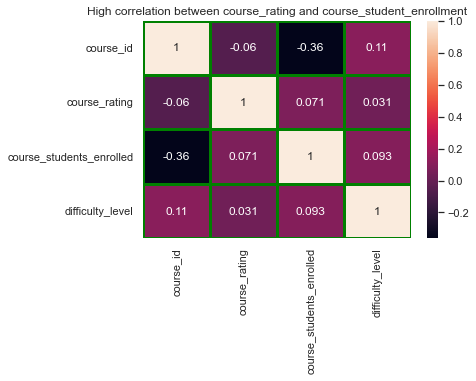

In [307]:
#This heatmap show that there is a high correlation between course_rating and course_student_enroolment.
#Its mean if the course_rating is high then definately student enroll those course
plt.title('High correlation between course_rating and course_student_enrollment', fontsize = 12) # title with fontsize 12
# setting the parameter values
linewidths = 3
linecolor = "green"

sns.heatmap(correlation, linewidths=linewidths,
                linecolor=linecolor, annot=True)


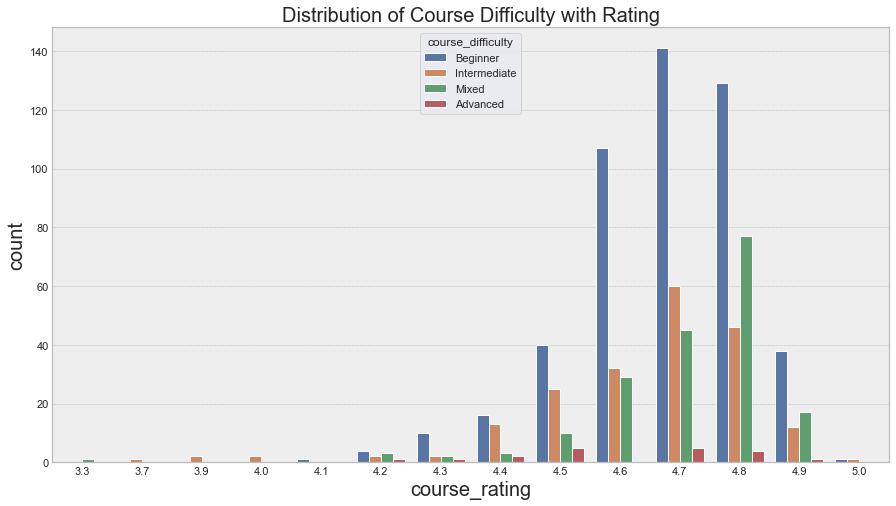

In [645]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set(rc={'figure.figsize':(12.7,10.27)})
ax.set_title("Distribution of Course Difficulty with Rating", fontsize =20)
ax.set_ylabel('Count', fontsize =20)
ax.set_xlabel('Course Rating', fontsize =20)
#sns.set_titile("DISTRIBUTION OF DIFFICULTY LEVEL AND CERTIFICATE TYPE")
sns.countplot(data=mydf,x = 'course_rating',hue= 'course_difficulty',ax=ax)
plt.show()
# fig,ax = plt.subplots(figsize=(12,8))
# sns.countplot(data=mydf,x = 'course_rating',hue= 'course_difficulty',ax=ax)


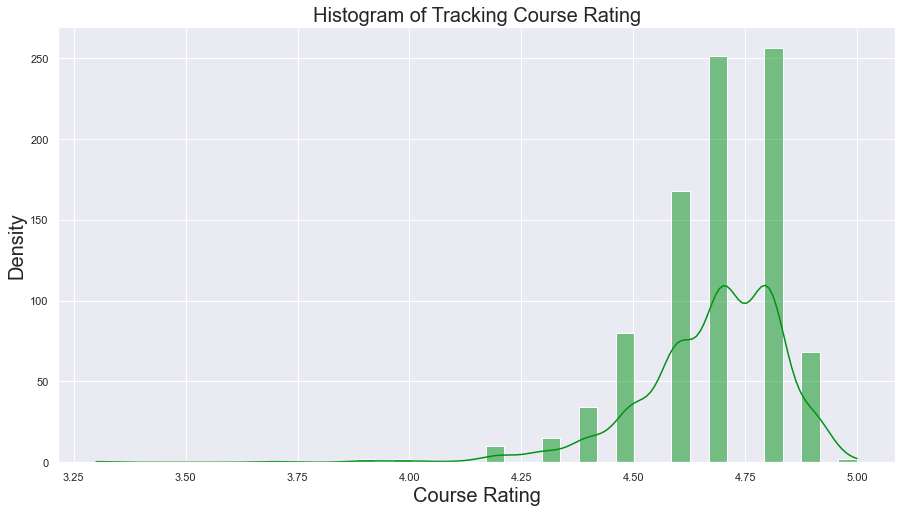

In [646]:

# plt.figure(figsize=(16,12)) # Figure Size
# sns.distplot(mydf.course_rating)

plt.figure(figsize=(15, 8))
sns.histplot(data=mydf, x="course_rating", color="#009213", kde=True)
plt.title("Histogram of Tracking Course Rating", fontsize=20)
plt.xlabel("Course Rating", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.show()


In [647]:
# Summarize only the data needed for analysis
mydf[['course_title','course_rating','course_difficulty','course_students_enrolled']]


course_title  course_rating  \
0    (ISC)² Systems Security Certified Practitioner...            4.7   
1    A Crash Course in Causality:  Inferring Causal...            4.7   
2                       A Crash Course in Data Science            4.5   
3                              A Law Student's Toolkit            4.7   
4                  A Life of Happiness and Fulfillment            4.8   
..                                                 ...            ...   
886                         Программирование на Python            4.5   
887               Психолингвистика (Psycholinguistics)            4.8   
888       Разработка интерфейсов: вёрстка и JavaScript            4.5   
889                            Русский как иностранный            4.6   
890      Финансовые инструменты для частного инвестора            4.7   

    course_difficulty  course_students_enrolled  
0            Beginner                      5300  
1        Intermediate                     17000  
2               Mixed                    130000  
3               Mixed                     91000  
4               Mixed                    320000  
..                ...                       ...  
886      Intermediate                     52000  
887             Mixed                     21000  
888      Intermediate                     30000  
889      Intermediate                      9800  
890          Beginner                     38000  

[891 rows x 4 columns]

In [397]:

# create DataFrame
df2 = pd.DataFrame(mydf[['course_title','course_rating','course_difficulty','course_students_enrolled']])
df2.columns=['title', 'rating', 'level', 'enrolled']
df2

title  rating         level  \
0    (ISC)² Systems Security Certified Practitioner...     4.7      Beginner   
1    A Crash Course in Causality:  Inferring Causal...     4.7  Intermediate   
2                       A Crash Course in Data Science     4.5         Mixed   
3                              A Law Student's Toolkit     4.7         Mixed   
4                  A Life of Happiness and Fulfillment     4.8         Mixed   
..                                                 ...     ...           ...   
886                         Программирование на Python     4.5  Intermediate   
887               Психолингвистика (Psycholinguistics)     4.8         Mixed   
888       Разработка интерфейсов: вёрстка и JavaScript     4.5  Intermediate   
889                            Русский как иностранный     4.6  Intermediate   
890      Финансовые инструменты для частного инвестора     4.7      Beginner   

     enrolled  
0        5300  
1       17000  
2      130000  
3       91000  
4      320000  
..        ...  
886     52000  
887     21000  
888     30000  
889      9800  
890     38000  

[891 rows x 4 columns]

In [648]:
# the column named 'course_students_enrolled' 
# having k with each value lets change this with 1000 so, that column look normal
mydf['course_students_enrolled']=mydf['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

###### 

In [399]:
#Top 10 courses based on rating
findtencourse=mydf[['course_title','course_rating']]
Tencourse = findtencourse.nlargest(10,['course_rating'])
Tencourse

course_title  course_rating
251  El Abogado del Futuro: Legaltech y la Transfor...            5.0
432                       Infectious Disease Modelling            5.0
36   Agile и Scrum в работе над проектами и продуктами            4.9
40                             American Contract Law I            4.9
61   Aprendiendo a aprender: Poderosas herramientas...            4.9
65                      Arizona State University TESOL            4.9
70   Aspectos básicos de la planificación y la gest...            4.9
82   Become a CBRS Certified Professional Installer...            4.9
98                  Boosting Creativity for Innovation            4.9
99   Brand Management: Aligning Business, Brand and...            4.9

# Research Q6: Can we find common paths through courses that students take?
>- Based on observations in graph student mostly prefer courses which having rating highest rating with mixed course difficulty level

#### Displaying the number of courses ny Certification type and the Number of courses by difficulty types

Text(0.5, 1.0, 'Coures Enrollment Count Based on Rating and Course difficulty')

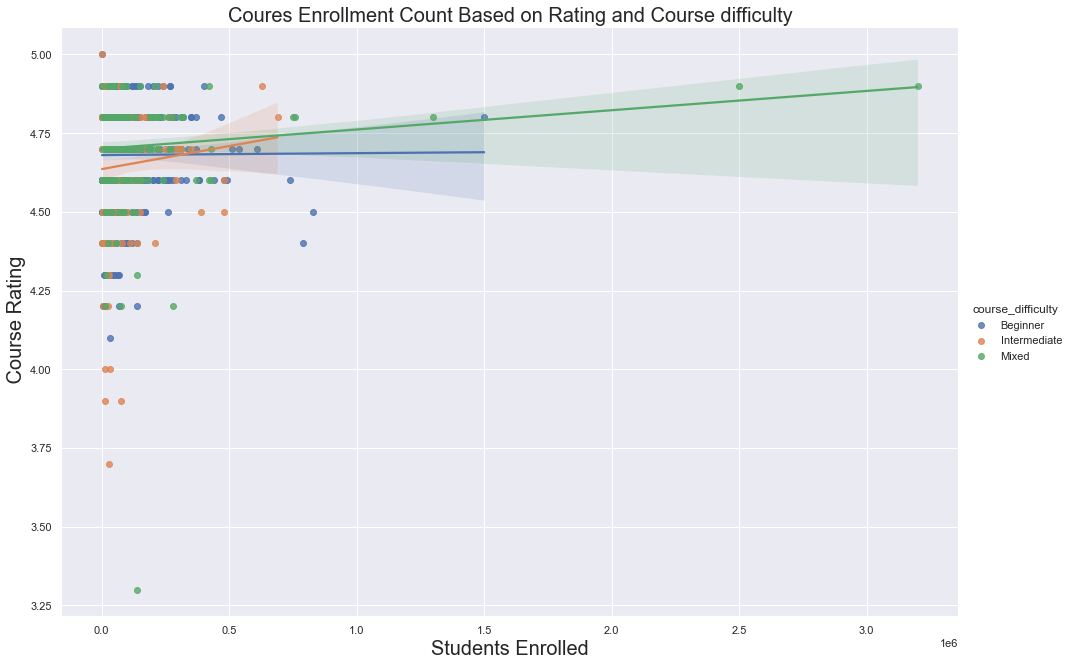

In [649]:

sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_difficulty", data=mydf.loc[mydf["course_difficulty"].isin(['Beginner','Intermediate','Mixed'])], 
           fit_reg=True, height=9, aspect=1.5)
plt.ylabel(" Course Rating", fontsize =20)
plt.xlabel("Students Enrolled", fontsize =20)
plt.title("Coures Enrollment Count Based on Rating and Course difficulty", fontsize =20)

Text(34.851437258873446, 0.5, ' Course Rating')

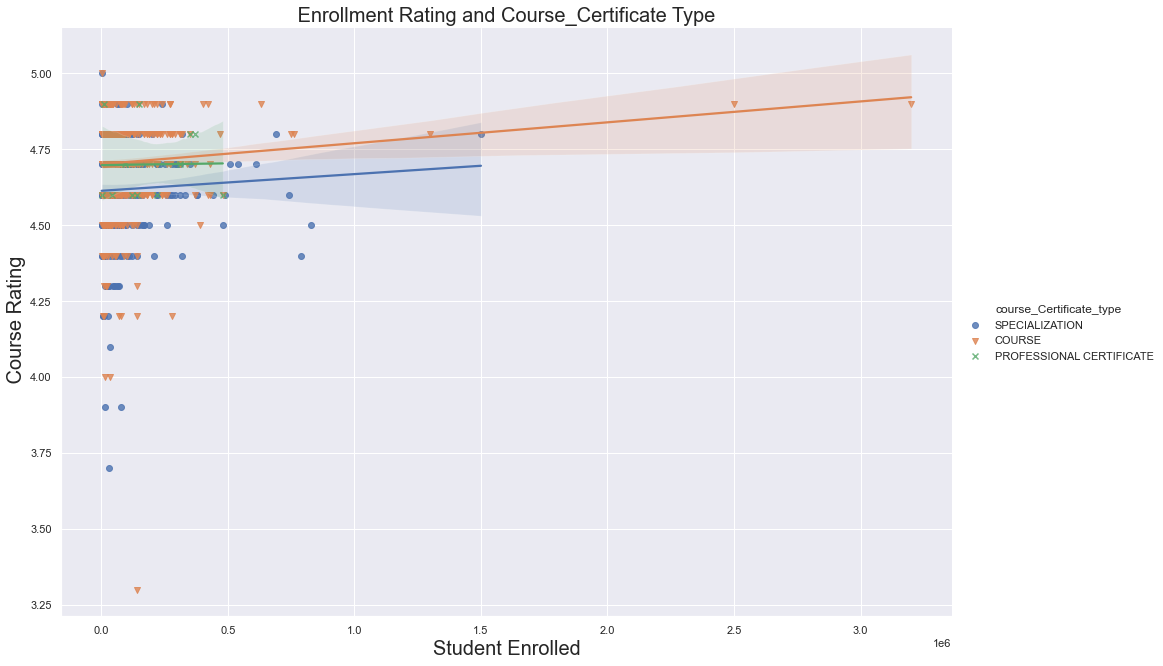

In [457]:

sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_Certificate_type", 
           data=mydf.loc[mydf["course_Certificate_type"].isin(['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'])], 
           fit_reg=True,markers =['o', 'v','x'], height=9, aspect=1.5)
#sns.set(rc={"figure.figsize":(8,4)})
plt.title(" Enrollment Rating and Course_Certificate Type ", fontsize =20)
plt.xlabel("Student Enrolled", fontsize=20)
plt.ylabel(" Course Rating", fontsize =20)

Text(32.01281055491255, 0.5, ' Course Rating')

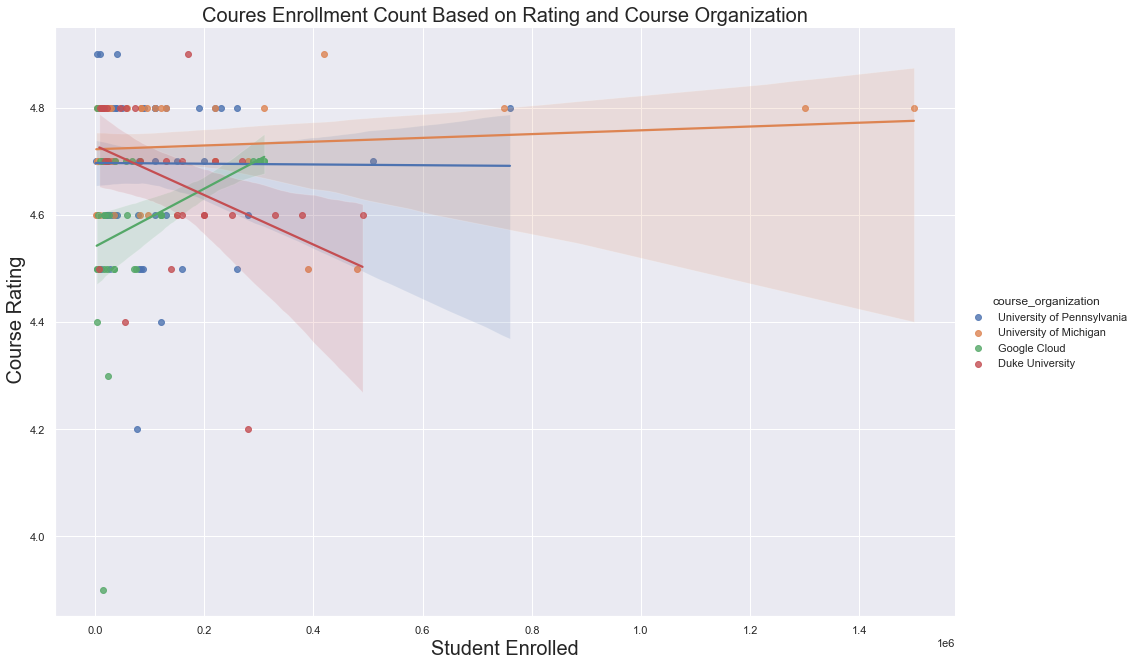

In [670]:
sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_organization", 
           data=mydf.loc[mydf["course_organization"].isin(['University of Pennsylvania','University of Michigan','Google Cloud','Duke University'   ])], 
           fit_reg=True, height=9, aspect=1.5)
plt.title("Coures Enrollment Count Based on Rating and Course Organization", fontsize =20)
plt.xlabel("Student Enrolled", fontsize=20)
plt.ylabel(" Course Rating", fontsize =20)

# RQ6: Popularity between the University and other course organization in Coursera
>- Difference between the University and other course organization, which one is doing better in term of enrolling students and their overall rating.

In [651]:
#Loading Coursera Dataset
uni = pd.read_csv('data/coursea_data.csv')
list_cct = list(uni['course_Certificate_type'])
list_cd = list(uni['course_difficulty'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
le.fit(list_cct)
le1.fit(list_cd)
#uni['course_Certificate_type'] = le.transform(uni['course_Certificate_type'])
#uni['course_difficulty'] = le1.transform(uni['course_difficulty'])
uni

Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled  
0                       5.3k  
1                        17k  
2                       130k  
3                        91k  
4                       320k  
..                       ...  
886                      52k  
887                      21k  
888                      30k  
889                     9.8k  
890                      38k  

[891 rows x 7 columns]

In [401]:
uni= uni.rename(columns={"Unnamed: 0": "course_id"})
uni['course_students_enrolled']

def coursera_function(a):
    if 'k' in a:
        return float(str(a).replace('k', '')) * (10 ** 3)
    if 'm' in a:
        return float(str(a).replace('m', '')) * (10 ** 6)
    else:
        return float(a)
uni['course_students_enrolled'] = uni['course_students_enrolled'].apply(coursera_function)
uni.head()

course_id                                       course_title  \
0        134  (ISC)² Systems Security Certified Practitioner...   
1        743  A Crash Course in Causality:  Inferring Causal...   
2        874                     A Crash Course in Data Science   
3        413                            A Law Student's Toolkit   
4        635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                    5300.0  
1      Intermediate                   17000.0  
2             Mixed                  130000.0  
3             Mixed                   91000.0  
4             Mixed                  320000.0

In [652]:
keywords = ['University']
uni['keyword'] = uni['course_organization'].str.findall('|'.join(keywords)).apply(set).str.join(', ')
for keyword in keywords:
   uni[keyword] =uni['course_organization'].str.contains(keyword)
uni

Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled     keyword  University  
0                       5.3k                   False  
1                        17k  University        True  
2                       130k  University        True  
3                        91k  University        True  
4                       320k                   False  
..                       ...         ...         ...  
886                      52k                   False  
887                      21k  University        True  
888                      30k                   False  
889                     9.8k  University        True  
890                      38k  University        True  

[891 rows x 9 columns]

In [653]:

#uni.drop(['keyword'], axis = 1, inplace = True) 
uni['University'] =uni['University'].map({True: 'University_Courses', False: 'Other_Organisation_Courses'})
uni

Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled     keyword                  University  
0                       5.3k              Other_Organisation_Courses  
1                        17k  University          University_Courses  
2                       130k  University          University_Courses  
3                        91k  University          University_Courses  
4                       320k              Other_Organisation_Courses  
..                       ...         ...                         ...  
886                      52k              Other_Organisation_Courses  
887                      21k  University          University_Courses  
888                      30k              Other_Organisation_Courses  
889                     9.8k  University          University_Courses  
890                      38k  University          University_Courses  

[891 rows x 9 columns]

Text(36.666538888888894, 0.5, 'Enrolled Students')

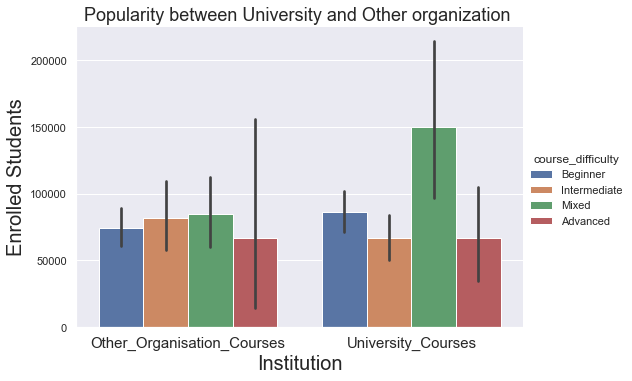

In [404]:

sns.catplot(x="University", y="course_students_enrolled", hue="course_difficulty",kind="bar", data=uni,height=5, aspect=1.5)
plt.title("Popularity between University and Other organization ", fontsize =18)
plt.xlabel("Institution", fontsize=20)
plt.xticks(size=15)

plt.ylabel("Enrolled Students", fontsize=20)


In [657]:
X = uni[['course_Certificate_type', 'course_difficulty','course_rating']]
X

course_Certificate_type course_difficulty  course_rating
0            SPECIALIZATION          Beginner            4.7
1                    COURSE      Intermediate            4.7
2                    COURSE             Mixed            4.5
3                    COURSE             Mixed            4.7
4                    COURSE             Mixed            4.8
..                      ...               ...            ...
886          SPECIALIZATION      Intermediate            4.5
887                  COURSE             Mixed            4.8
888          SPECIALIZATION      Intermediate            4.5
889          SPECIALIZATION      Intermediate            4.6
890          SPECIALIZATION          Beginner            4.7

[891 rows x 3 columns]

In [658]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

course_rating  course_Certificate_type_PROFESSIONAL CERTIFICATE  \
0            4.7                                                 0   
1            4.7                                                 0   
2            4.5                                                 0   
3            4.7                                                 0   
4            4.8                                                 0   

   course_Certificate_type_SPECIALIZATION  course_difficulty_Beginner  \
0                                       1                           1   
1                                       0                           0   
2                                       0                           0   
3                                       0                           0   
4                                       0                           0   

   course_difficulty_Intermediate  course_difficulty_Mixed  
0                               0                        0  
1                               1                        0  
2                               0                        1  
3                               0                        1  
4                               0                        1

In [659]:
uni[['number','k',]] = uni['course_students_enrolled'].str.extract('(\d+\.?\d*)([A-Za-z]+)', expand = True)


In [660]:
uni

Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled     keyword                  University number  k  
0                       5.3k              Other_Organisation_Courses    5.3  k  
1                        17k  University          University_Courses     17  k  
2                       130k  University          University_Courses    130  k  
3                        91k  University          University_Courses     91  k  
4                       320k              Other_Organisation_Courses    320  k  
..                       ...         ...                         ...    ... ..  
886                      52k              Other_Organisation_Courses     52  k  
887                      21k  University          University_Courses     21  k  
888                      30k              Other_Organisation_Courses     30  k  
889                     9.8k  University          University_Courses    9.8  k  
890                      38k  University          University_Courses     38  k  

[891 rows x 11 columns]

In [668]:
Y = uni['number']
Y

0      5.3
1       17
2      130
3       91
4      320
      ... 
886     52
887     21
888     30
889    9.8
890     38
Name: number, Length: 891, dtype: object

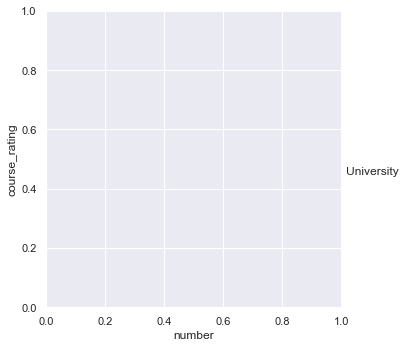

In [667]:
sns.lmplot(x="number", y="course_rating", hue ="University", data=uni.loc[uni["University"].isin(['True','False'])], fit_reg=True)

In [664]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [665]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [666]:
predictions = model.predict(X_train)
predictions

array([ 65.17763715,  61.7073661 ,  88.39946883,  87.24271181,
        65.17763715,  81.75733495,  96.75066979,  87.24271181,
        64.02088013,  59.69226029,  64.02088013,  83.77244076,
        87.24271181,  65.17763715,  64.02088013,  84.07084899,
        59.69226029,  58.53550327,  62.86412311,  87.24271181,
        55.06523222,  89.55622585,  96.75066979,  88.39946883,
        88.39946883,  88.39946883,  64.02088013,  61.7073661 ,
        96.75066979,  59.39385206,  96.75066979,  89.55622585,
        61.7073661 ,  58.53550327,  96.75066979,  89.55622585,
        85.227606  ,  82.91409197,  88.39946883,  58.53550327,
        61.7073661 ,  88.39946883,  84.07084899,  64.02088013,
        87.24271181,  85.227606  ,  56.22198924,  64.02088013,
        61.7073661 ,  55.41612069,  96.75066979,  87.24271181,
        95.59391277,  96.75066979,  87.24271181,  62.86412311,
        65.17763715,  95.59391277, 212.63080332,  82.91409197,
        61.7073661 ,  57.37874625,  96.75066979,  86.08